# SussexBudgetProductions

Candidate numbe r= 277239

In [1]:
#this is a code cell. Write the code that you want to do things in it. Include some comments with the code to 
#explain what you are doing, where appropriate. 

myfile='movie_metadata.csv'
#standard imports for when working with pandas
import numpy as np
import seaborn as sns
from collections import Counter
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF

#matplotlib inline

from matplotlib import pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [3]:
columns = {"director_facebook_likes" : "director_fbk_likes",
           "director_facebook_likes" : "director_fbk_likes", 
           "actor_3_facebook_likes" : "actor_3_fbk_likes",
           "actor_1_facebook_likes" : "actor_1_fbk_likes",
           "cast_total_facebook_likes" : "cast_total_fbk_likes",
           "actor_2_facebook_likes" : "actor_2_fbk_likes",
           "movie_facebook_likes" : "movie_fbk_likes"}

df.rename(columns=columns,inplace=True)

df.dropna(inplace=True)

#for x in ["num_critic_for_reviews","duration","director_fbk_likes","actor_3_fbk_likes","gross","actor_1_fbk_likes","facenumber_in_poster","num_user_for_reviews","budget","title_year","actor_2_fbk_likes"]:
for x in ["actor_3_fbk_likes","actor_1_fbk_likes","facenumber_in_poster","title_year","actor_2_fbk_likes"]:
    df[x] = df[x].astype("Int64")



print(len(pd.unique(df[df.duplicated("movie_title")].movie_title)))

df.drop_duplicates("movie_title",keep="first",inplace=True,ignore_index=True)

df["profit"]=(df.gross-df.budget)
#df["profit_percent"]=(df.profit_percent/10).round()*10

95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   3654 non-null   object 
 1   director_name           3654 non-null   object 
 2   num_critic_for_reviews  3654 non-null   float64
 3   duration                3654 non-null   float64
 4   director_fbk_likes      3654 non-null   float64
 5   actor_3_fbk_likes       3654 non-null   Int64  
 6   actor_2_name            3654 non-null   object 
 7   actor_1_fbk_likes       3654 non-null   Int64  
 8   gross                   3654 non-null   float64
 9   genres                  3654 non-null   object 
 10  actor_1_name            3654 non-null   object 
 11  movie_title             3654 non-null   object 
 12  num_voted_users         3654 non-null   int64  
 13  cast_total_fbk_likes    3654 non-null   int64  
 14  actor_3_name            3654 non-null   

In [5]:
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_fbk_likes,actor_3_fbk_likes,actor_2_name,actor_1_fbk_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_fbk_likes,imdb_score,aspect_ratio,movie_fbk_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009,936,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007,5000,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015,393,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000,Christian Bale,27000,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012,23000,8.5,2.35,164000,198130642.0
4,Color,Andrew Stanton,462.0,132.0,475.0,530,Samantha Morton,640,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012,632,6.6,2.35,24000,-190641321.0


Plotting the correaltion of the columns using spearmen correlation method

Low correlation: gross and num_critic_for_reviews
Negligible correlation: gross and duration
Negligible correlation: gross and director_fbk_likes
Low correlation: gross and actor_3_fbk_likes
Low correlation: gross and actor_1_fbk_likes
Very high correlation: gross and gross
Moderate correlation: gross and num_voted_users
Low correlation: gross and cast_total_fbk_likes
Negligible correlation: gross and facenumber_in_poster
Moderate correlation: gross and num_user_for_reviews
Moderate correlation: gross and budget
Negligible correlation: gross and title_year
Low correlation: gross and actor_2_fbk_likes
Negligible correlation: gross and imdb_score
Negligible correlation: gross and aspect_ratio
Negligible correlation: gross and movie_fbk_likes


<Axes: >

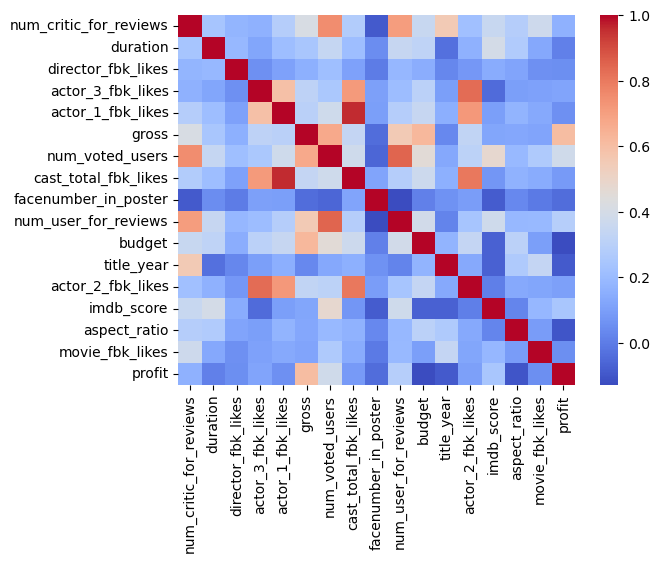

In [6]:
df_num = df.select_dtypes(include=[np.number])

corr = df_num.corr(method="spearman")
cols = df_num.columns

col1 = "gross"
for col2 in cols[:-1]:
    correlation = corr[col1][col2]
    if np.abs(correlation) < 0.3:
        print(f"Negligible correlation: {col1} and {col2}")
    if 0.3 <= np.abs(correlation) < 0.5:
        print(f"Low correlation: {col1} and {col2}")
    if 0.5 <= np.abs(correlation) < 0.7:
        print(f"Moderate correlation: {col1} and {col2}")
    if 0.7 <= np.abs(correlation) < 0.9:
        print(f"High correlation: {col1} and {col2}")
    if 0.9 <= np.abs(correlation):
        print(f"Very high correlation: {col1} and {col2}")


sns.heatmap(data=corr, cmap="coolwarm")
            


Grouping based on the genre aand taking the mean and filtering it based on the profit, i.e profit>0 and budget < 1.5 million

In [7]:
genreseries=df.groupby('genres')[["profit","num_critic_for_reviews","num_voted_users","cast_total_fbk_likes","num_user_for_reviews","budget","gross"]].mean()
#set the max budget

max_budget = 1500000

top_rated_genre = genreseries[genreseries['profit']>0]
Top_budget_genres = top_rated_genre[top_rated_genre['budget']<=max_budget]
Top_budget_genres = Top_budget_genres.sort_values('profit', ascending=False)
#print the genres for inspection

Top_budget_genres


,profit,num_critic_for_reviews,num_voted_users,cast_total_fbk_likes,num_user_for_reviews,budget,gross
genres,,,,,,,
Adventure|Family|Romance,39052600.0,5.0,3411.0,1090.0,36.0,500000.0,39552600.0
Adventure|Biography|Drama|Horror|Thriller,30000882.0,235.0,42256.0,67.0,916.0,500000.0,30500882.0
Documentary|History|Music,12700000.0,53.0,12631.0,778.0,63.0,600000.0,13300000.0
Comedy|Documentary|Drama,11464368.0,193.0,85028.0,0.0,404.0,65000.0,11529368.0
Documentary|Drama|Sport,7130611.0,53.0,18980.0,15.0,74.0,700000.0,7830611.0
Adventure|Horror|Sci-Fi,4790000.0,67.0,4812.0,205.0,88.0,210000.0,5000000.0
Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi,4768918.0,82.0,12160.0,3071.0,73.0,750000.0,5518918.0
Biography|Crime|Documentary|History|Thriller,1957978.0,194.0,40481.0,68.0,134.0,1000000.0,2957978.0
Biography|Documentary|Sport,1547570.0,70.0,6790.0,194.0,80.0,500000.0,2047570.0


getting the top 6 genres

In [8]:
Top_genre=['Adventure','Family','Romance','Biography','Drama','Horror']
Top_genre

['Adventure', 'Family', 'Romance', 'Biography', 'Drama', 'Horror']

Plotting the box plots to check for any outliers

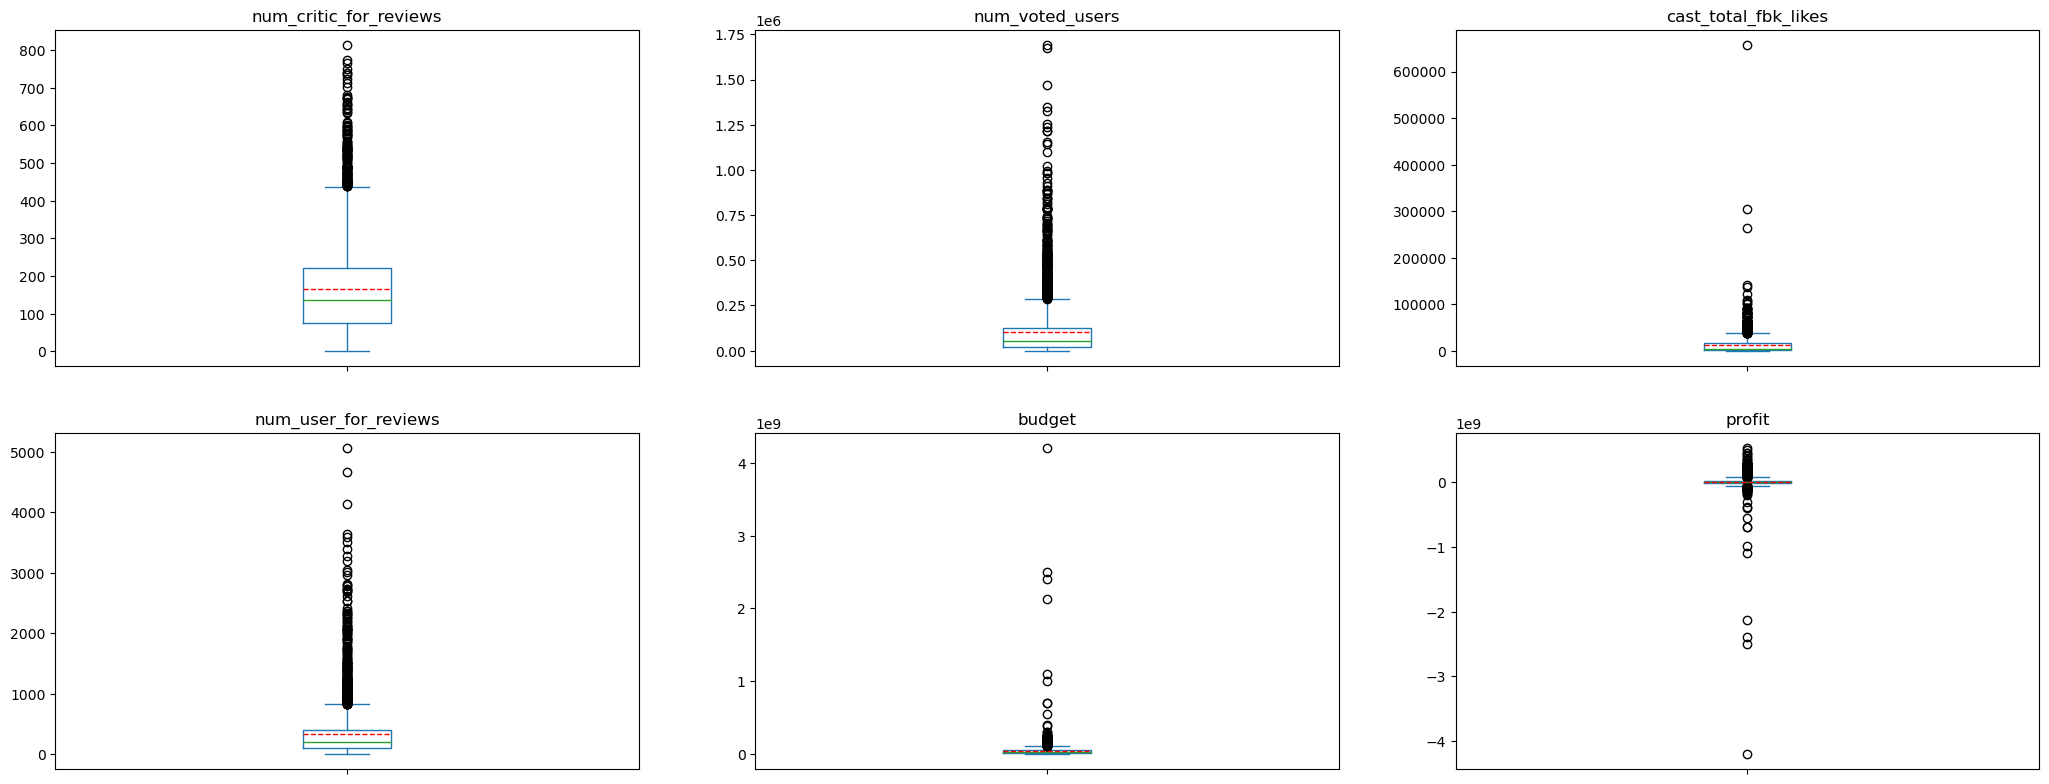

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 3)

df_cols = ["num_critic_for_reviews","num_voted_users","cast_total_fbk_likes","num_user_for_reviews","budget","profit"]

for col, ax in zip(df_cols,axes.flat):
    df.plot(kind="box",ax=ax,y=col,meanline=True,showmeans=True,meanprops={"color":"r"})
    ax.set_xticklabels([""])
    ax.set_title(col)
    
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 2)

Plotting KDE plots for getting density, mean and median

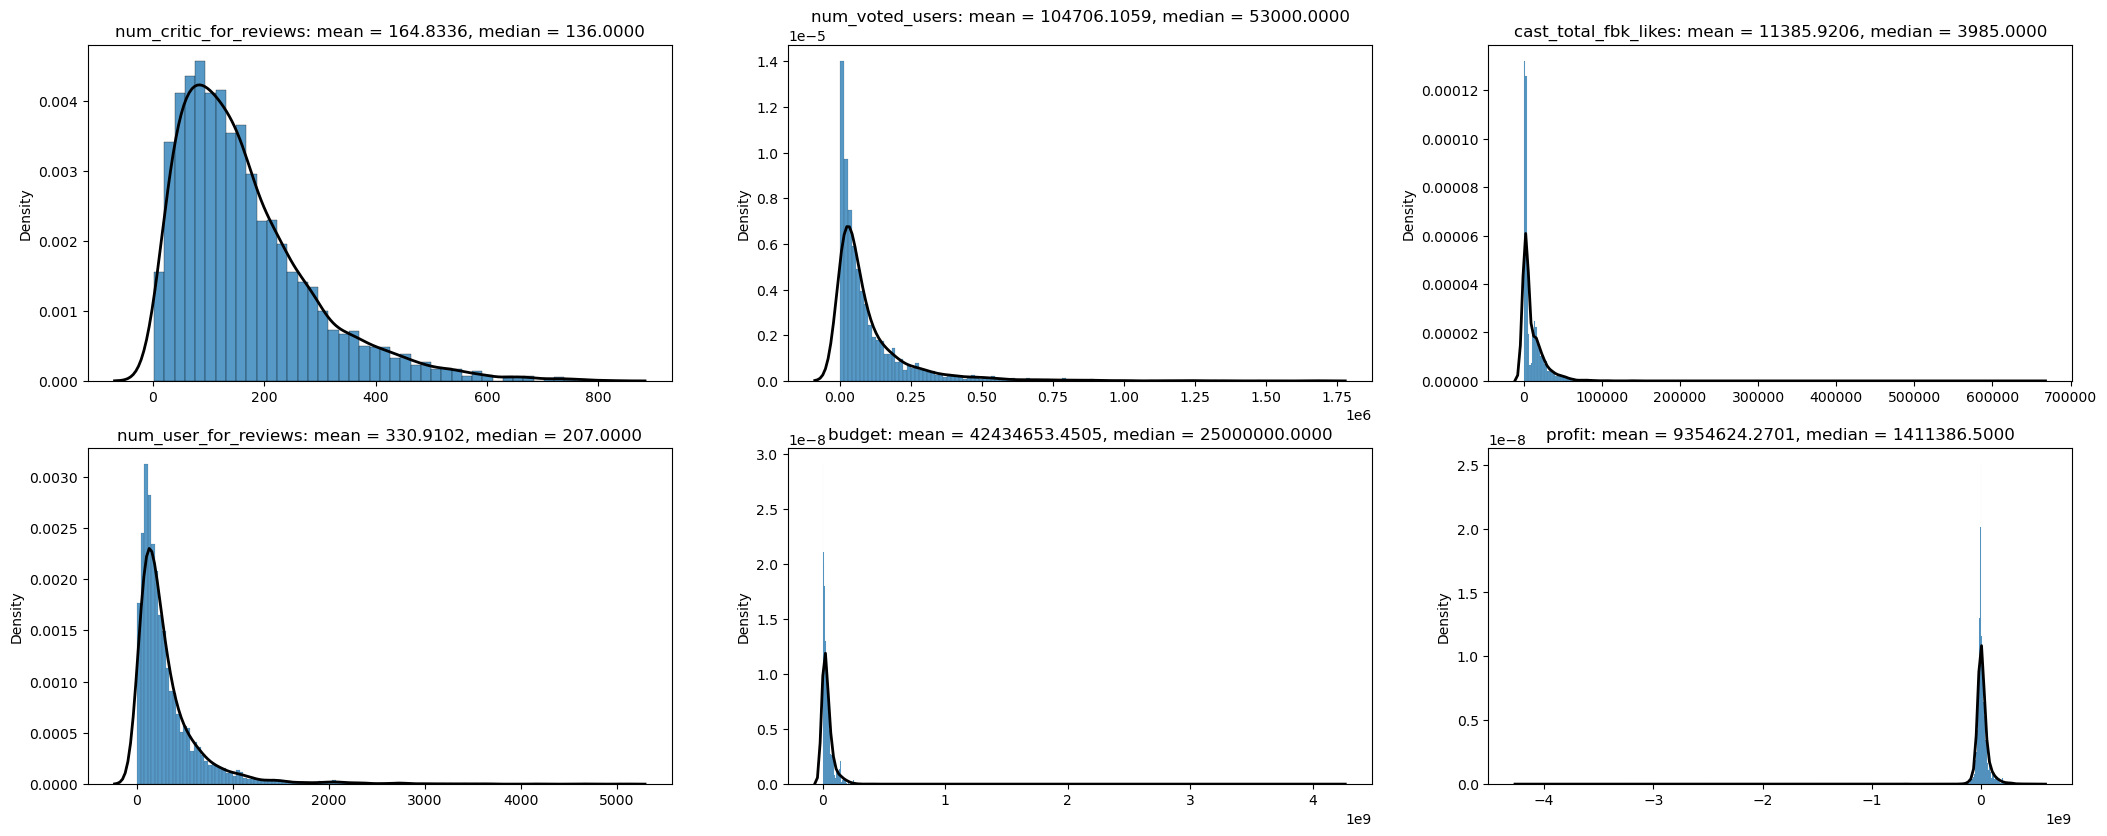

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 3)


for col, ax in zip(df_cols,axes.flat):
    sns.histplot(data=df,x=col,ax=ax, stat="density")
    
    sns.kdeplot(data=df,x=col,ax=ax,color="k", linewidth=2)
    mean = df[col].mean() 
    median = df[col].median()
    ax.set_title(f"{col}: mean = {mean:.4f}, median = {median:.4f}")
    ax.set_xlabel("")
    
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 2)

Plotting KDE and Hist plot for checking if the distribution is gaussian or not 

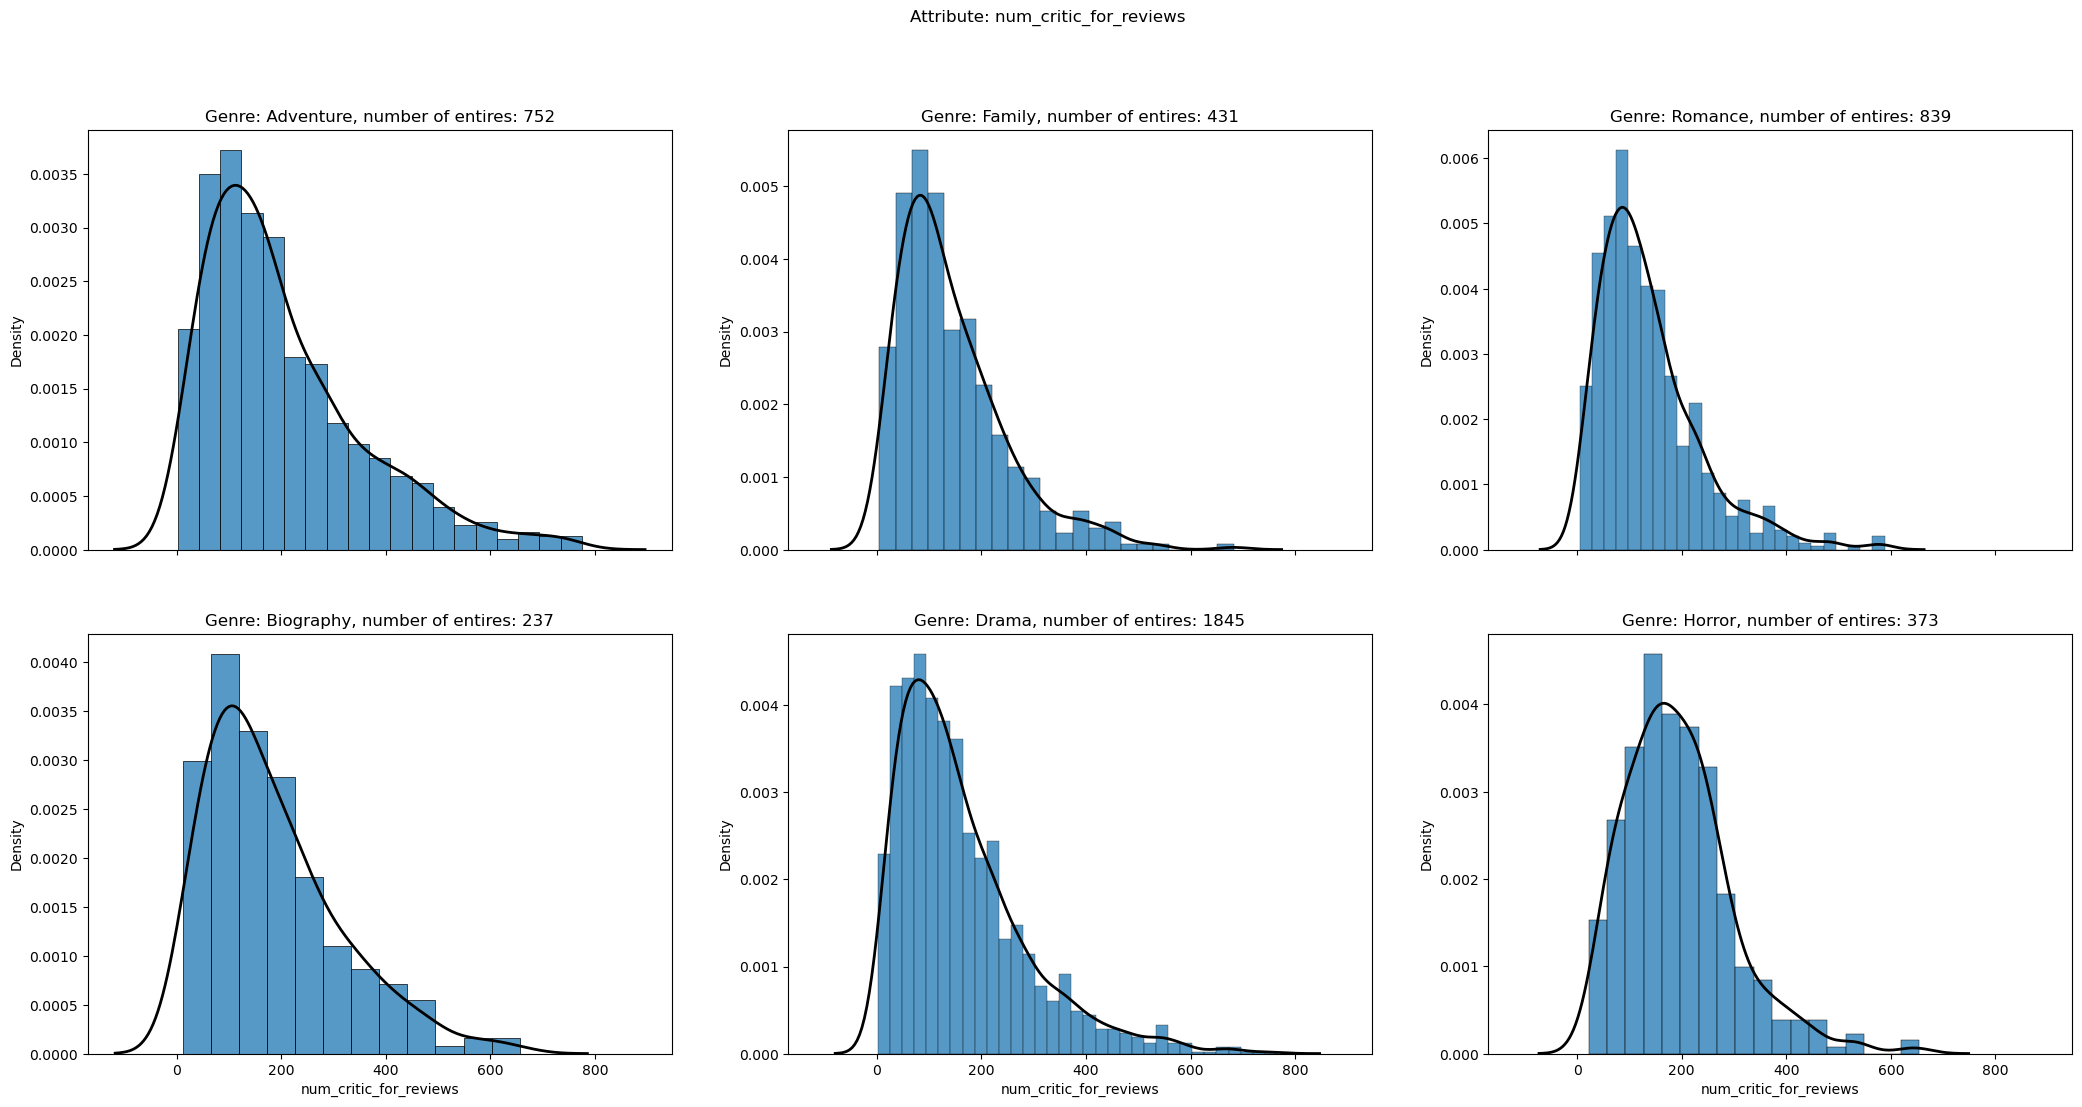

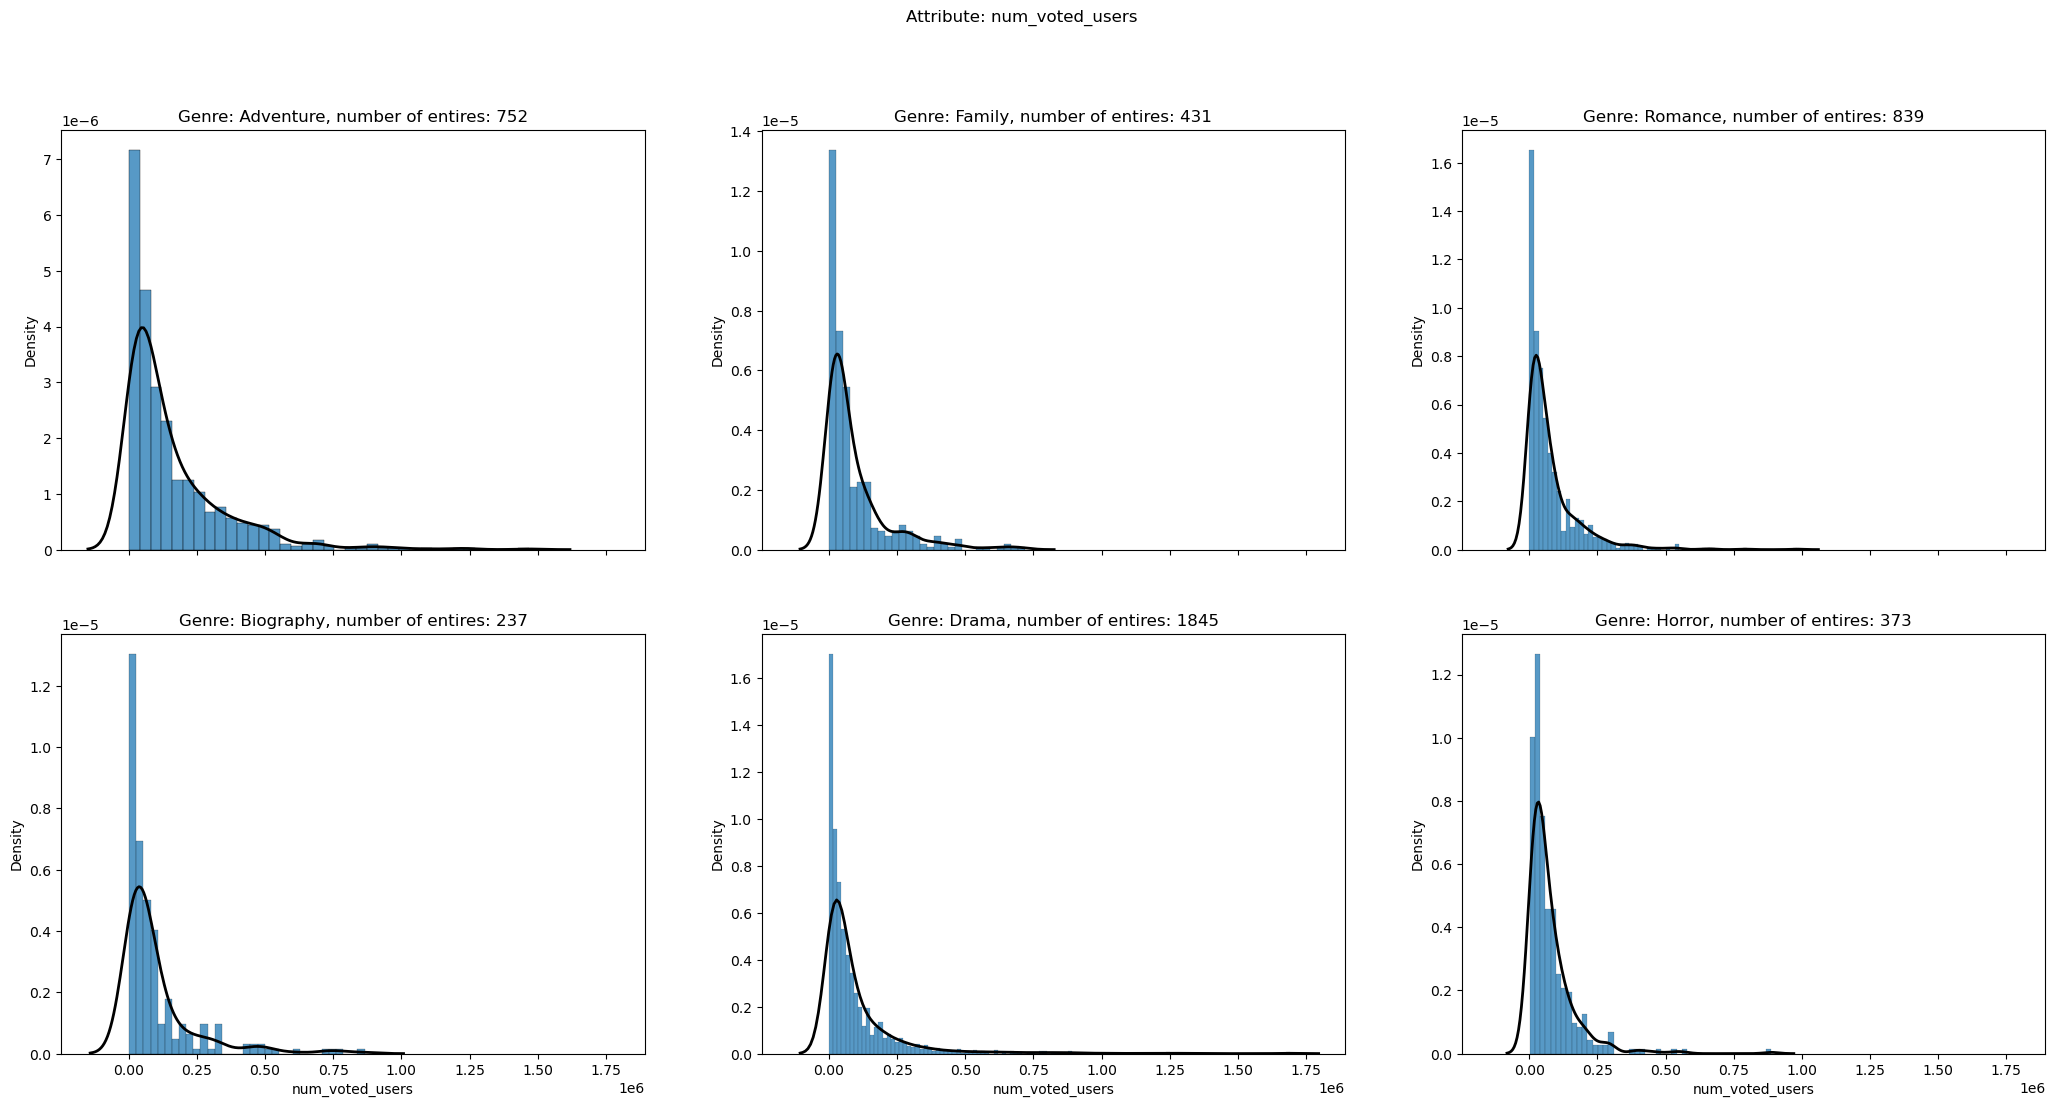

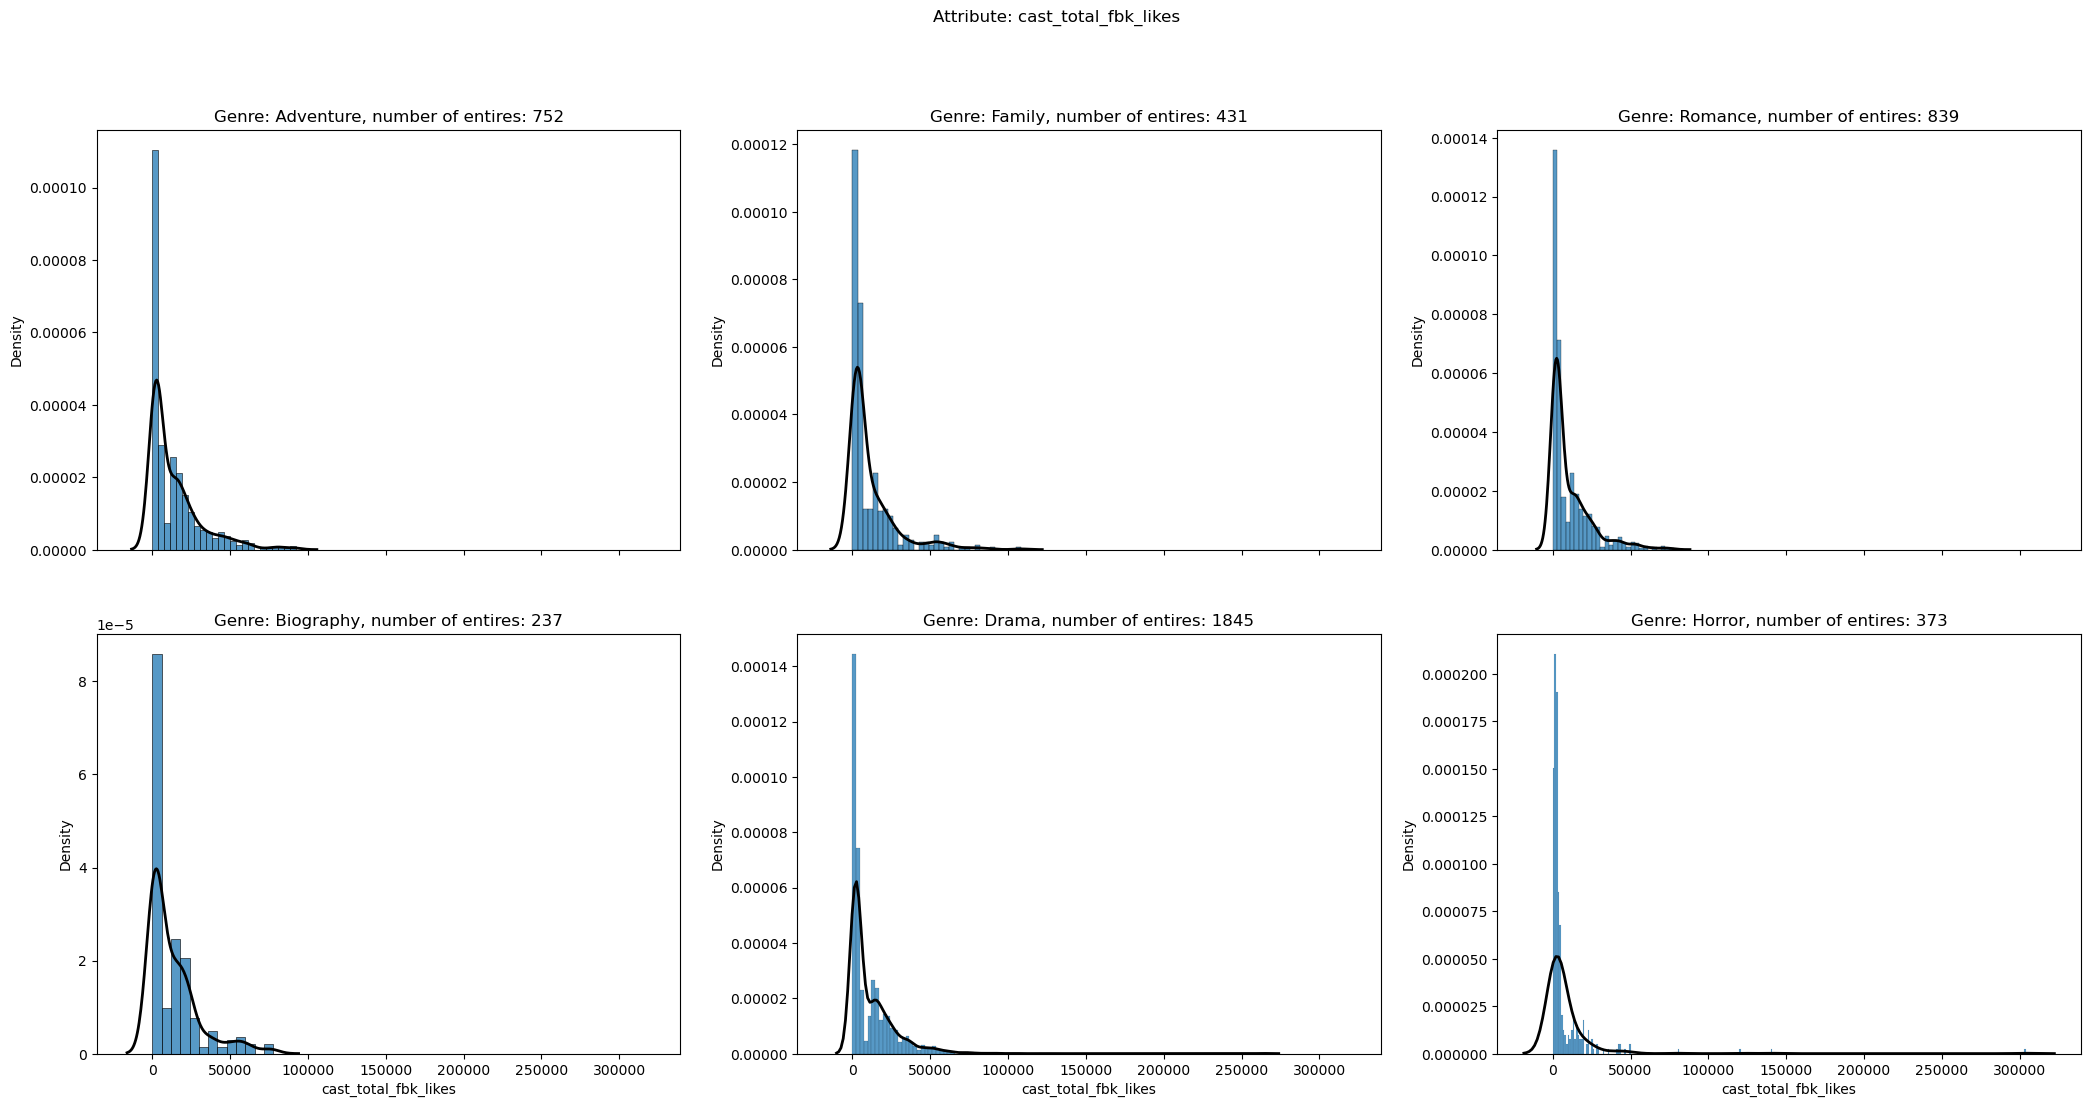

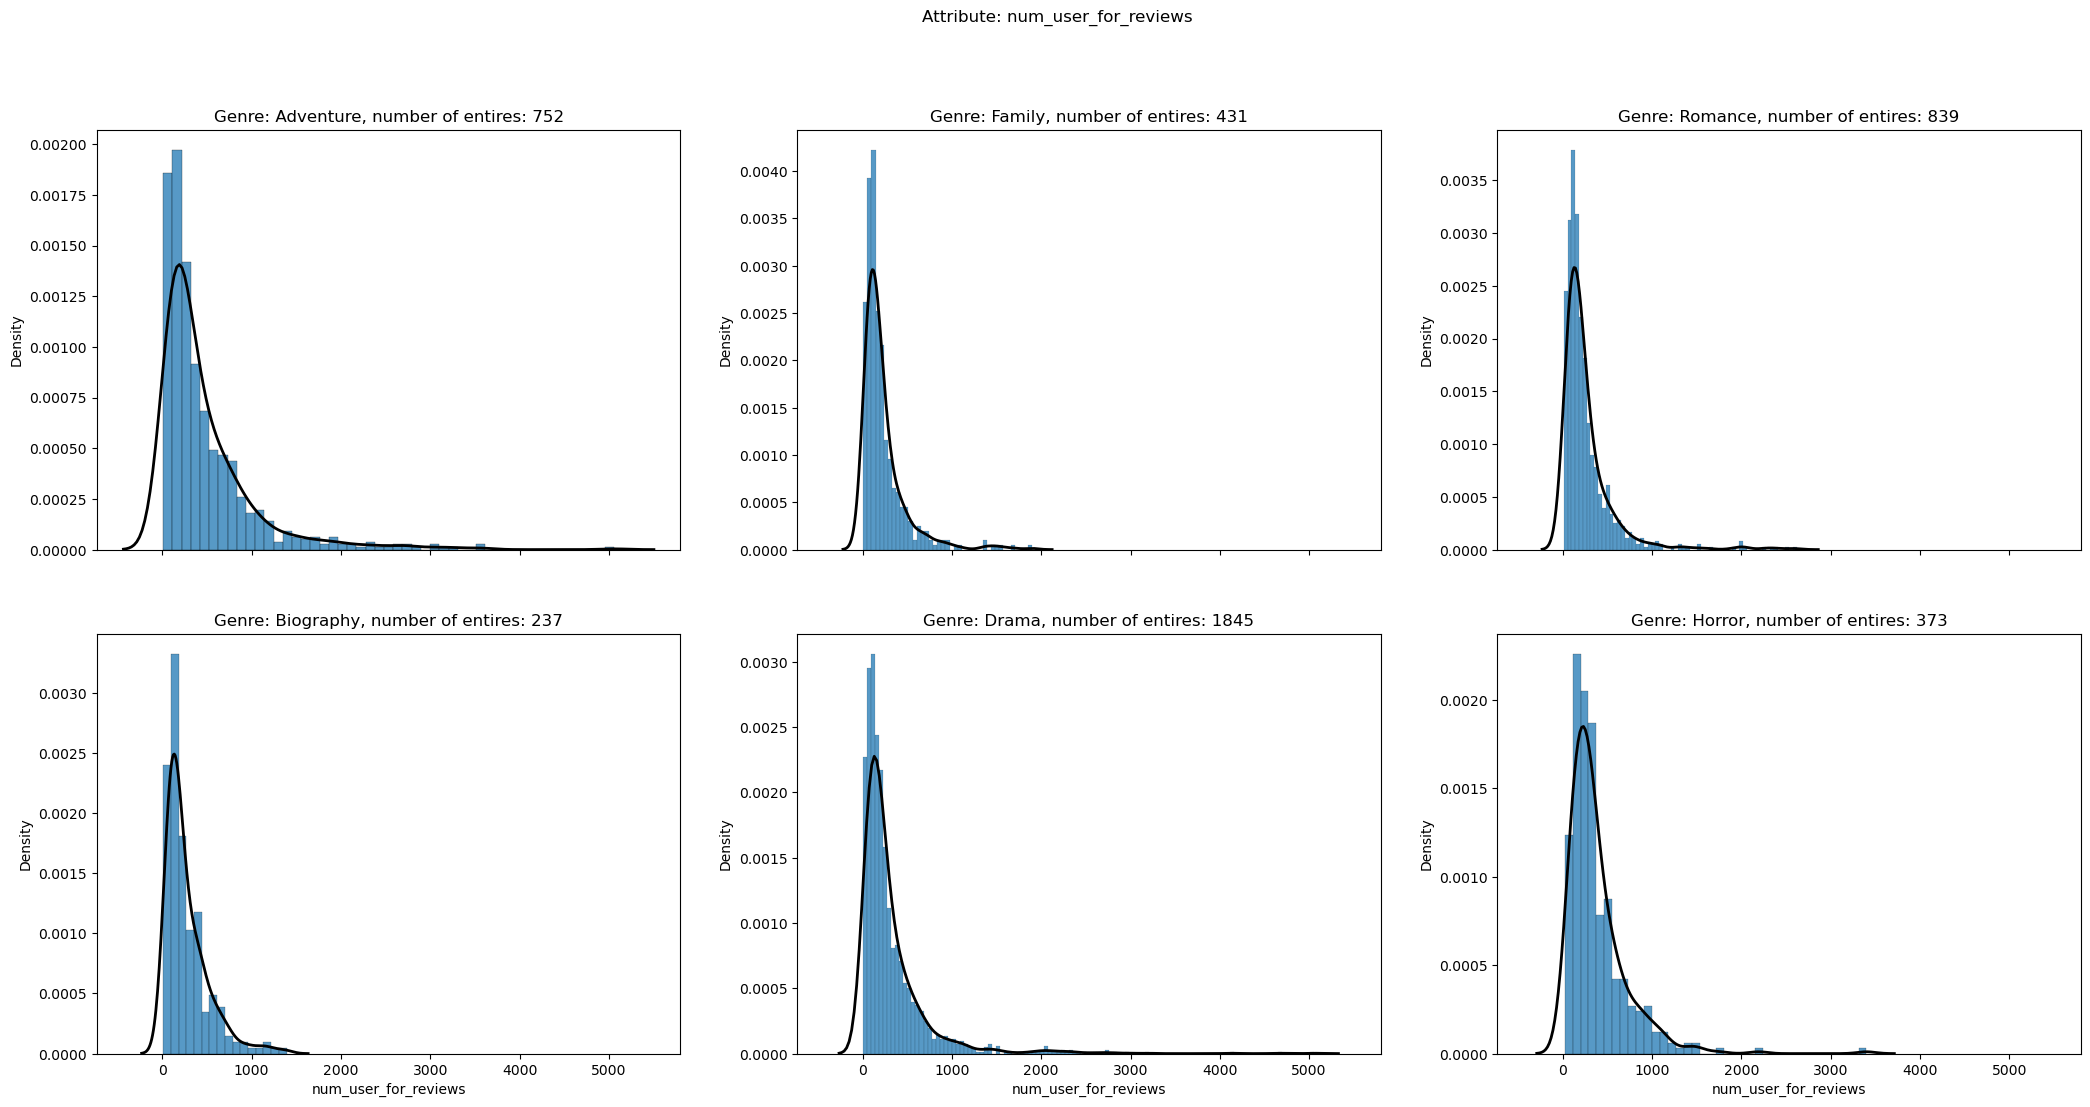

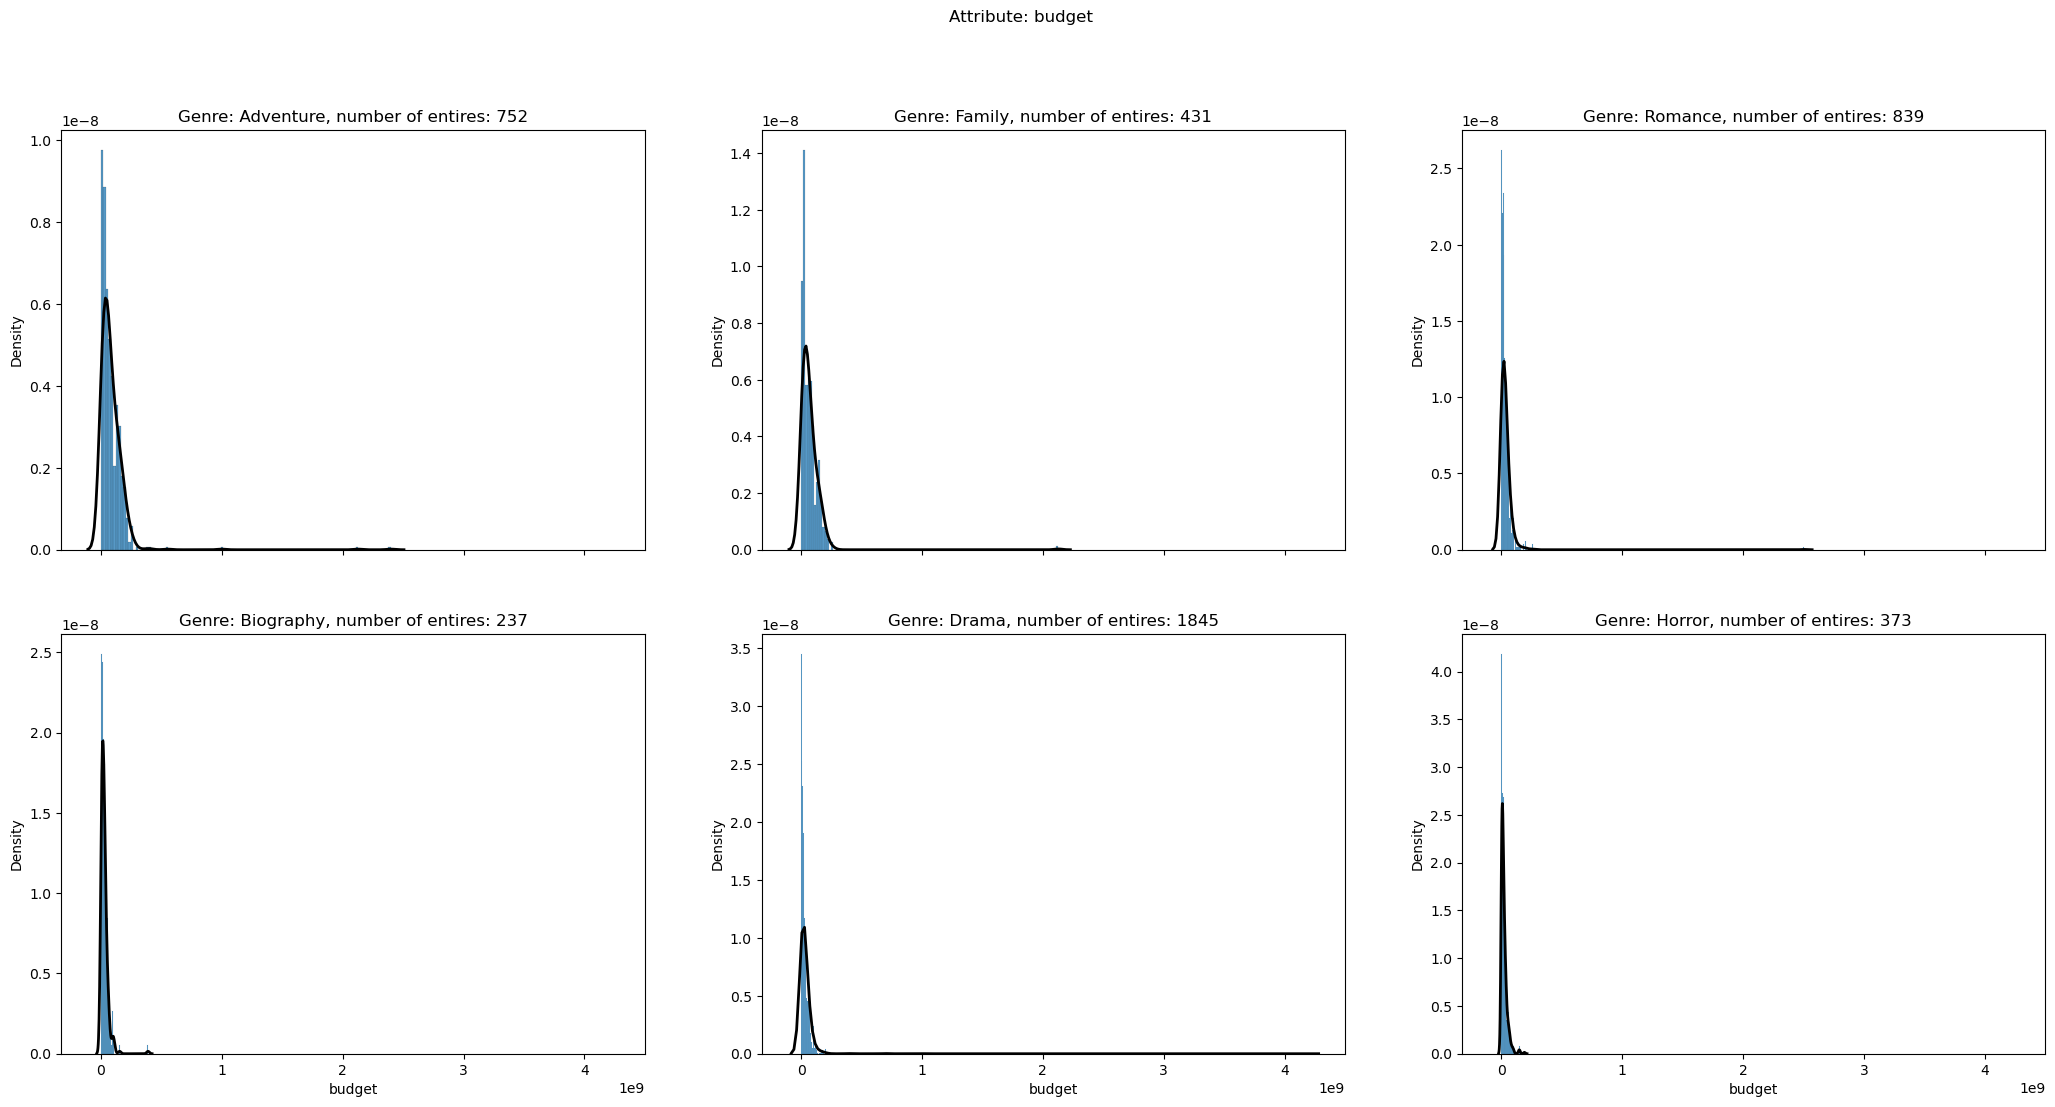

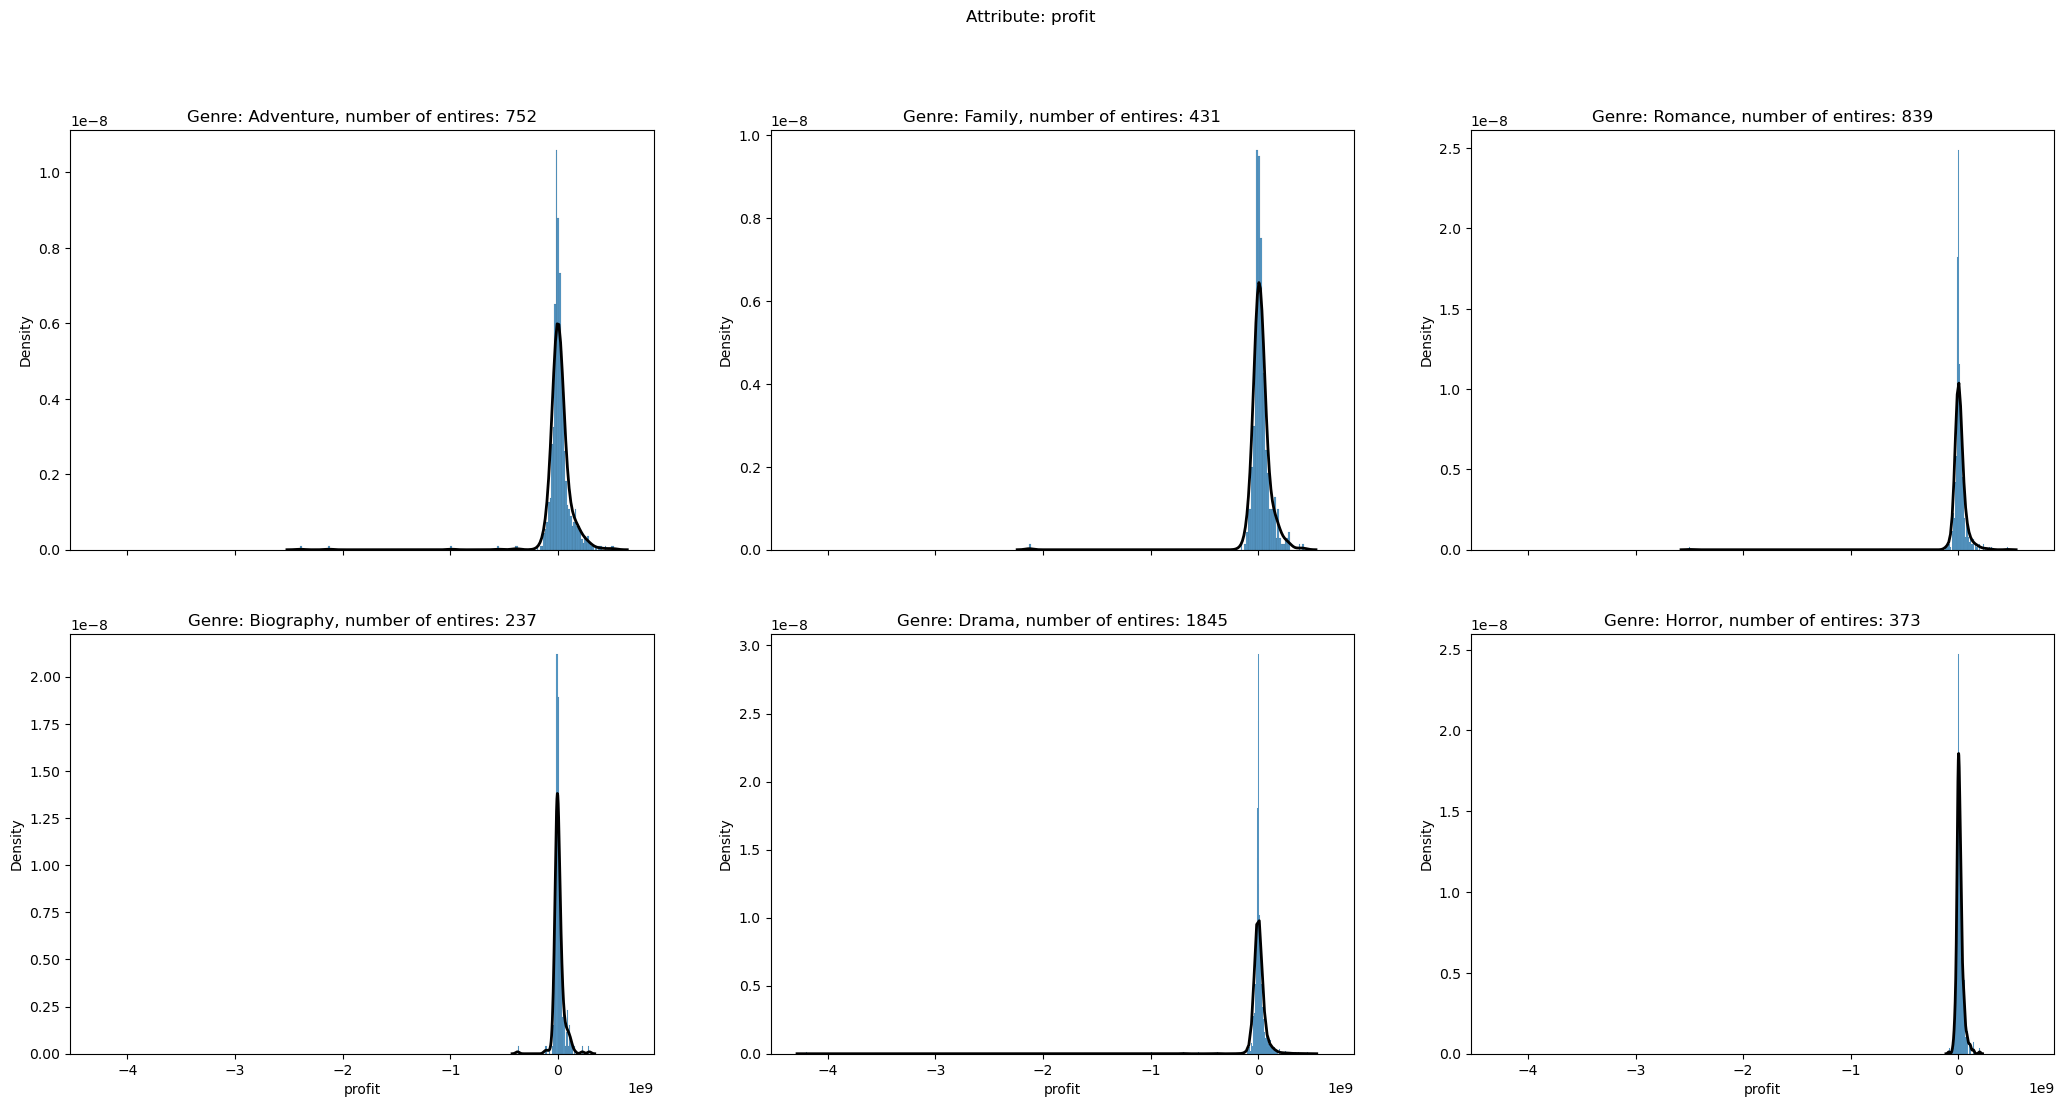

In [11]:
for col in df_cols:
    col_series = df[[col,"genres"]]
    
    fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True)
    for q,ax in zip(Top_genre,axes.flatten()):
        
        q_series = col_series[col_series["genres"].str.contains(q)][col]

        sns.histplot(data=q_series,ax=ax, stat="density")
        sns.kdeplot(data=q_series,ax=ax,color="k", linewidth=2)
        
        ax.set_title(f"Genre: {q}, number of entires: {len(q_series)}")
        
    fig.suptitle(f"Attribute: {col}")
    fig.set_figwidth(fig.get_figwidth() * 4)
    fig.set_figheight(fig.get_figheight() * 2.5)

num_critic_for_reviews, num_voted_users,cast_total_fbk_likes looks Gaussian but it has few outliers

num_user_for_reviews,budget,profit doesn't look Gaussian at all

## num_critic_for_reviews

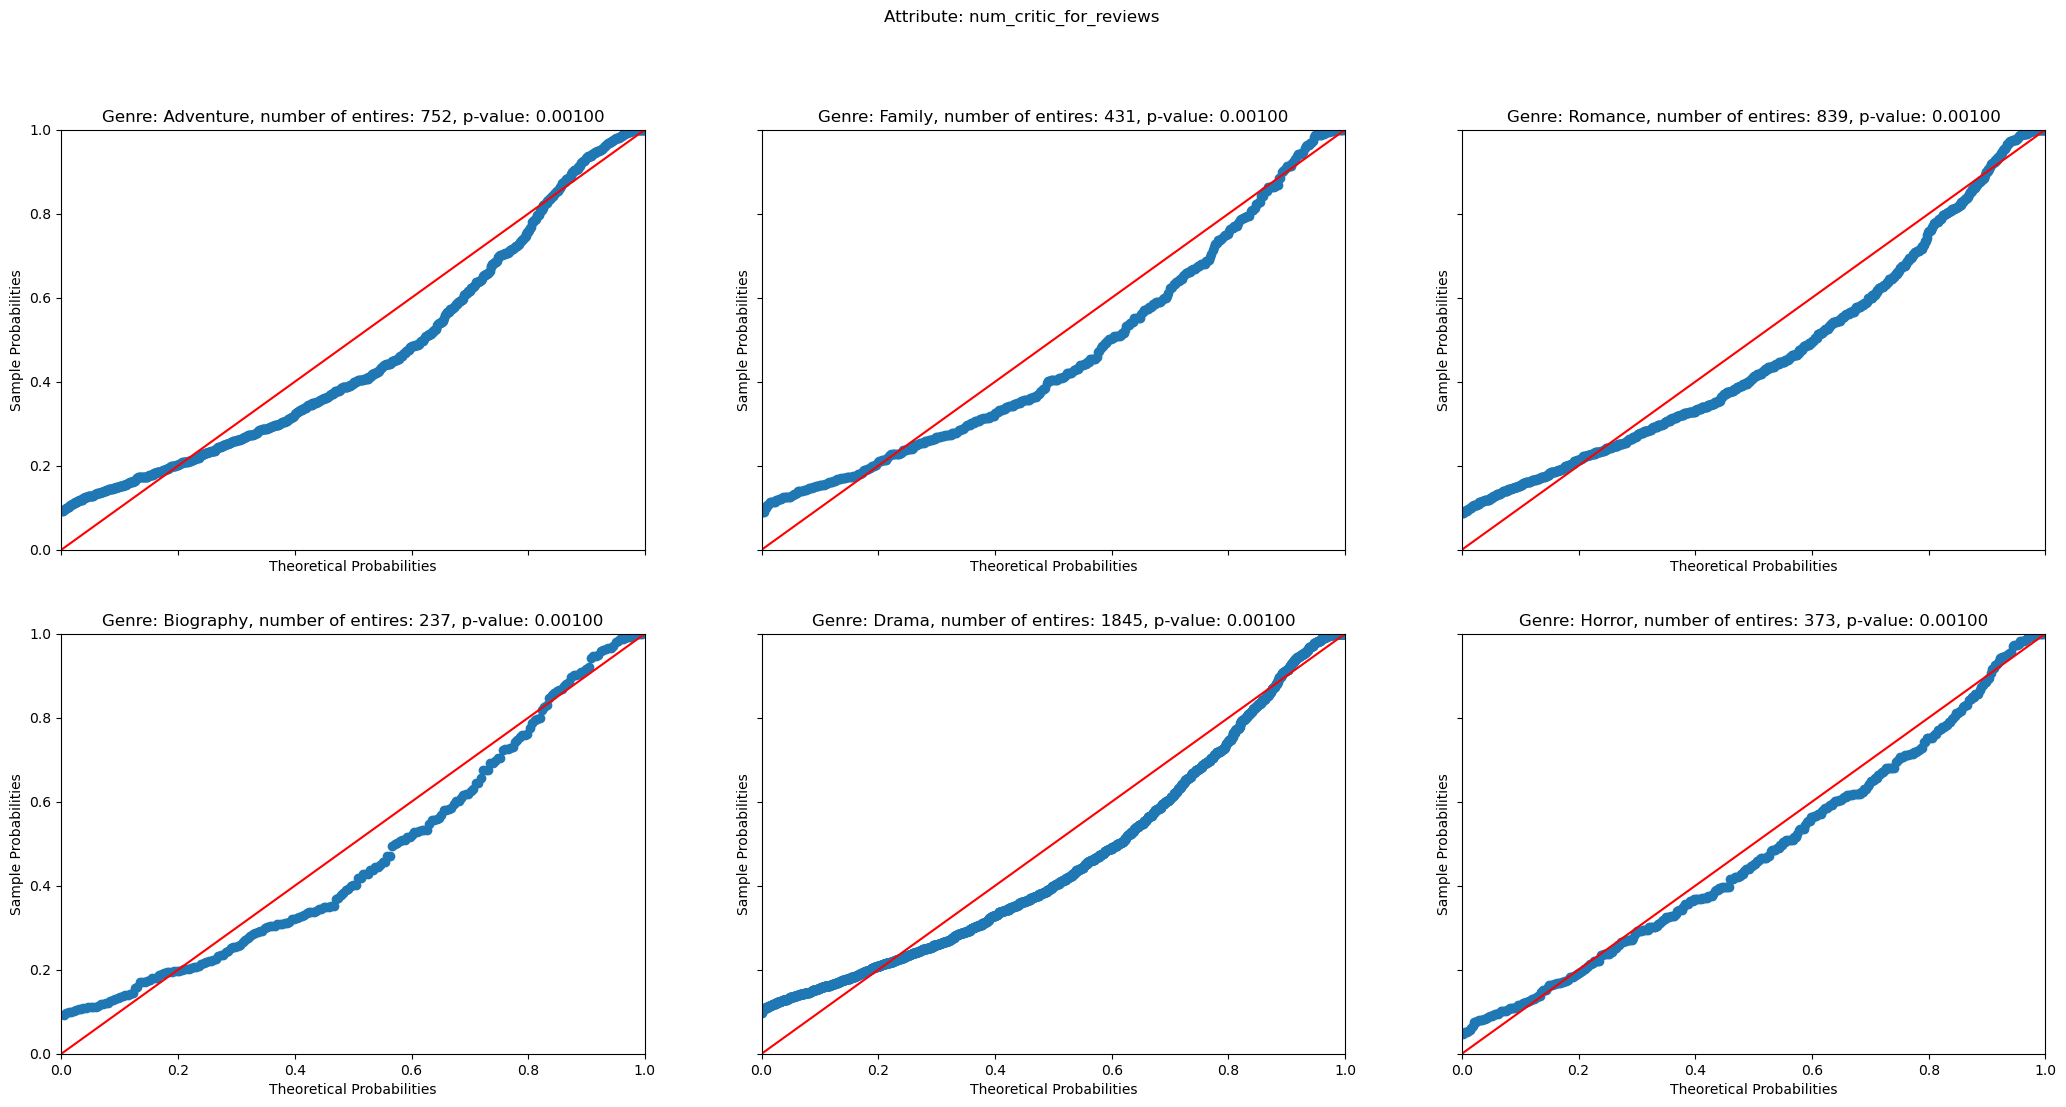

In [12]:
col = "num_critic_for_reviews"
col_series = df[[col,"genres"]]

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey=True)
for q,ax in zip(Top_genre,axes.flatten()):
    q_series = col_series[col_series["genres"].str.contains(q)][col]
    _, p_value = lilliefors(q_series,dist="norm")

    pp_x = sm.ProbPlot(q_series, dist=norm, fit=True)
    pp_x.ppplot(line="45",ax=ax)
    
    ax.set_title(f"Genre: {q}, number of entires: {len(q_series)}, p-value: {p_value:.5f}")

fig.suptitle(f"Attribute: {col}")

fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 2.5)

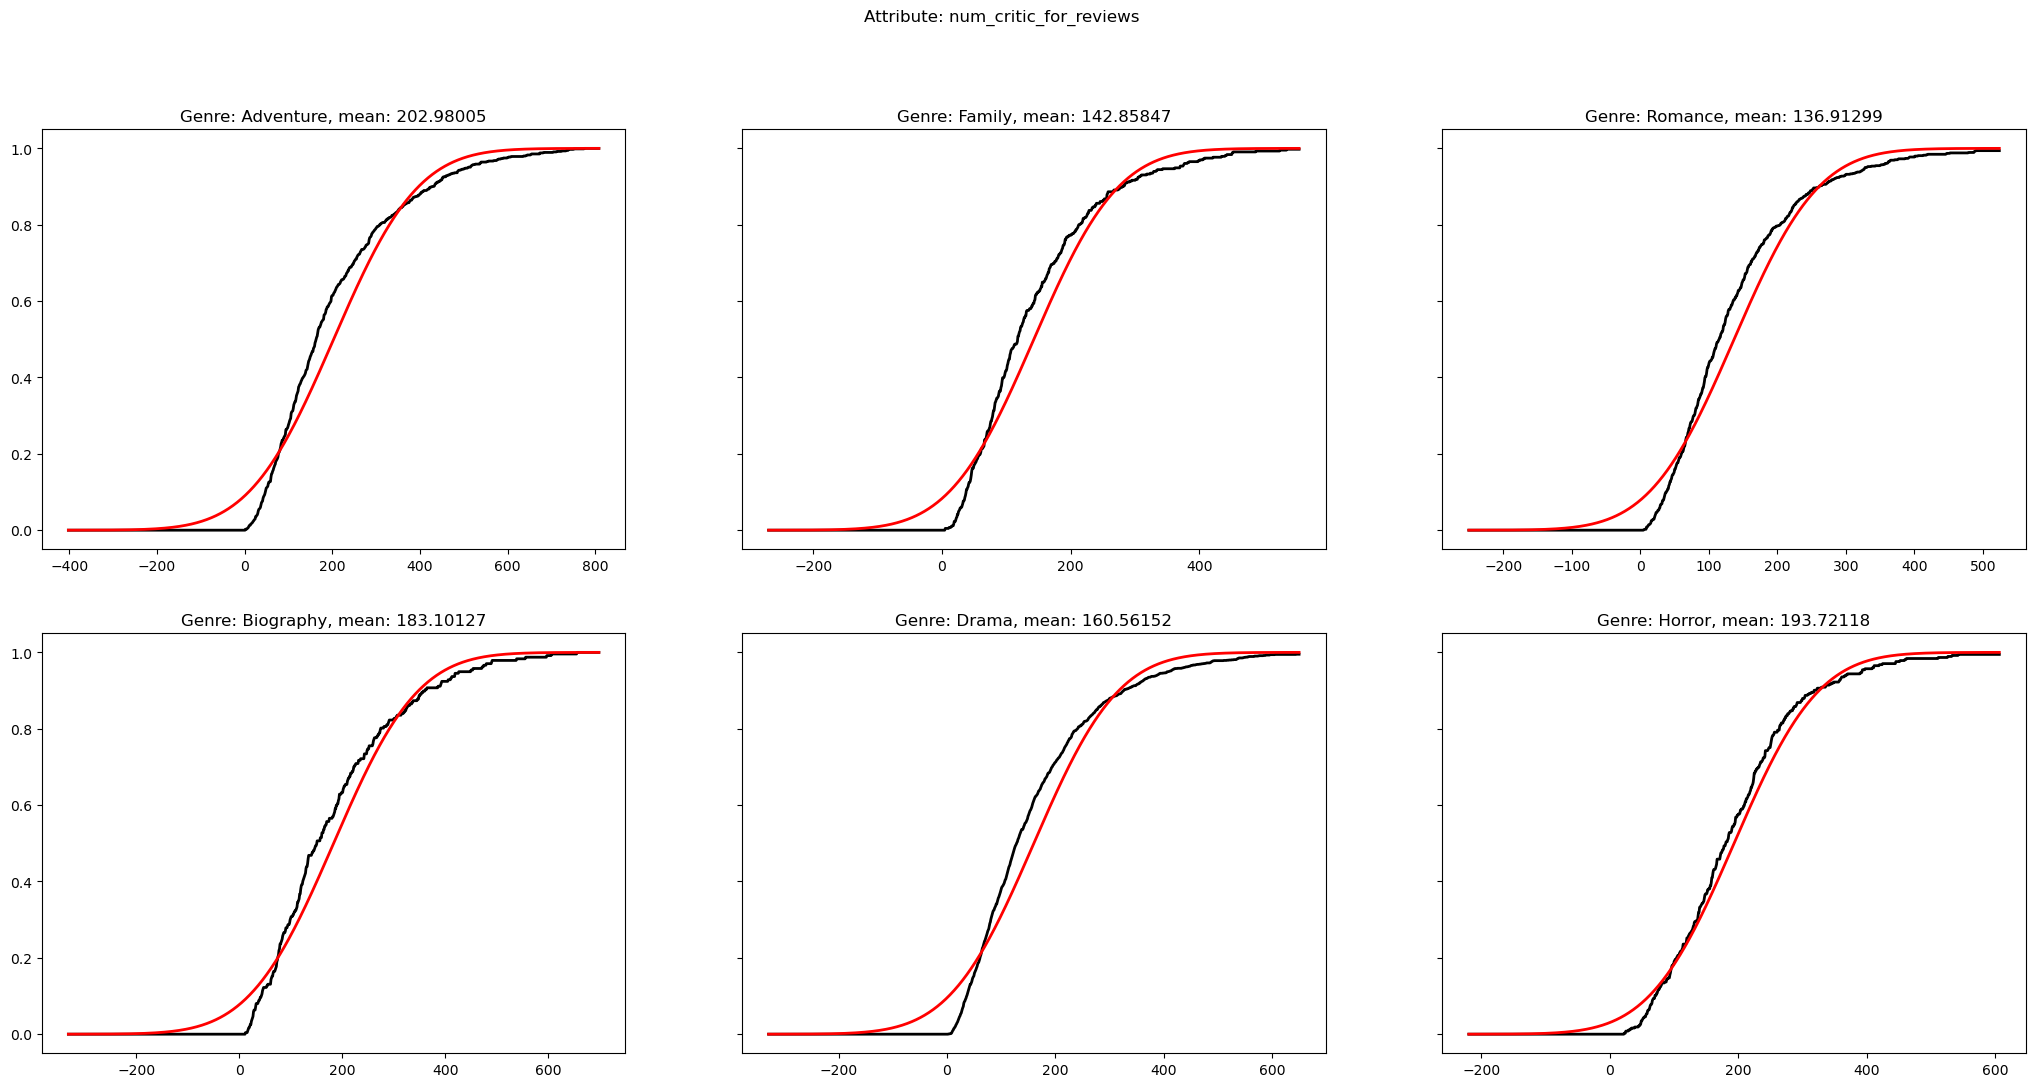

In [13]:
from statsmodels.distributions.empirical_distribution import ECDF

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharey=True)
for q,ax in zip(Top_genre,axes.flatten()):
    q_series = col_series[col_series["genres"].str.contains(q)][col]
    ecdf = ECDF(q_series)
    
    mean = q_series.mean()
    std = q_series.std(ddof=1)
    
    xax = np.linspace(mean - 4*std,mean + 4*std,1001)
    
    ax.plot(xax,ecdf(xax),c="k",lw=2)
    ax.plot(xax,norm(loc=mean,scale=std).cdf(xax),c="r",lw=2)
    
    ax.set_title(f"Genre: {q}, mean: {mean:.5f}")

fig.suptitle(f"Attribute: {col}")
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 2.5)

In [14]:
def bootstrap_diff_means(data_1,data_2,num_bootstraps=10000):
    m_1 = np.mean(data_1)
    m_2 = np.mean(data_2)
    v_1 = np.var(data_1, ddof=1)
    v_2 = np.var(data_2, ddof=1)
    n_1 = len(data_1)
    n_2 = len(data_2)
    se = np.sqrt(v_1/n_1 + v_2/n_2)
    t_stat = (m_1 - m_2)/se

    comb_m = (np.sum(data_1) + np.sum(data_2))/(n_1 + n_2)

    adj_col1 = data_1 - m_1 + comb_m
    adj_col2 = data_2 - m_2 + comb_m

    count = 0
    for _ in range(num_bootstraps):
        bs_1 = np.array([adj_col1[i] for i in np.random.randint(0,n_1,size=n_1)])
        bs_2 = np.array([adj_col2[i] for i in np.random.randint(0,n_2,size=n_2)]) 
        
        bs_m_1 = np.mean(bs_1)
        bs_m_2 = np.mean(bs_2)
        bs_v_1 = np.var(bs_1,ddof=1)
        bs_v_2 = np.var(bs_2,ddof=1)
        bs_se = np.sqrt(bs_v_1/n_1 + bs_v_2/n_2)
        
        bs_t_stat = (bs_m_1 - bs_m_2)/bs_se
        
        if np.abs(bs_t_stat) >= np.abs(t_stat):
            count += 1 

    return m_1 - m_2, t_stat, (count+1)/(num_bootstraps+1)


In [15]:
for q1,q2 in zip(Top_genre[:-2],Top_genre[1:]):

    data_1 = col_series[col_series["genres"].str.contains(q1)][col].to_numpy()
    data_2 = col_series[col_series["genres"].str.contains(q2)][col].to_numpy()
    
    d0 = 0 
    dbar, _, p_value = bootstrap_diff_means(data_1,data_2)
    print(f"Comparing {col} quality rating {q1} and {q2}")
    print(f"There is a probability of {p_value:.4f} that the observed difference of mean being different to {dbar:.4f} given the underlying difference of means is 0")
    print("\n")

Comparing num_critic_for_reviews quality rating Adventure and Family
There is a probability of 0.0001 that the observed difference of mean being different to 60.1216 given the underlying difference of means is 0


Comparing num_critic_for_reviews quality rating Family and Romance
There is a probability of 0.3229 that the observed difference of mean being different to 5.9455 given the underlying difference of means is 0


Comparing num_critic_for_reviews quality rating Romance and Biography
There is a probability of 0.0001 that the observed difference of mean being different to -46.1883 given the underlying difference of means is 0


Comparing num_critic_for_reviews quality rating Biography and Drama
There is a probability of 0.0124 that the observed difference of mean being different to 22.5397 given the underlying difference of means is 0




Based on critic reviews genre Horror, maybe we can make movie in horror genre.

## num_voted_users

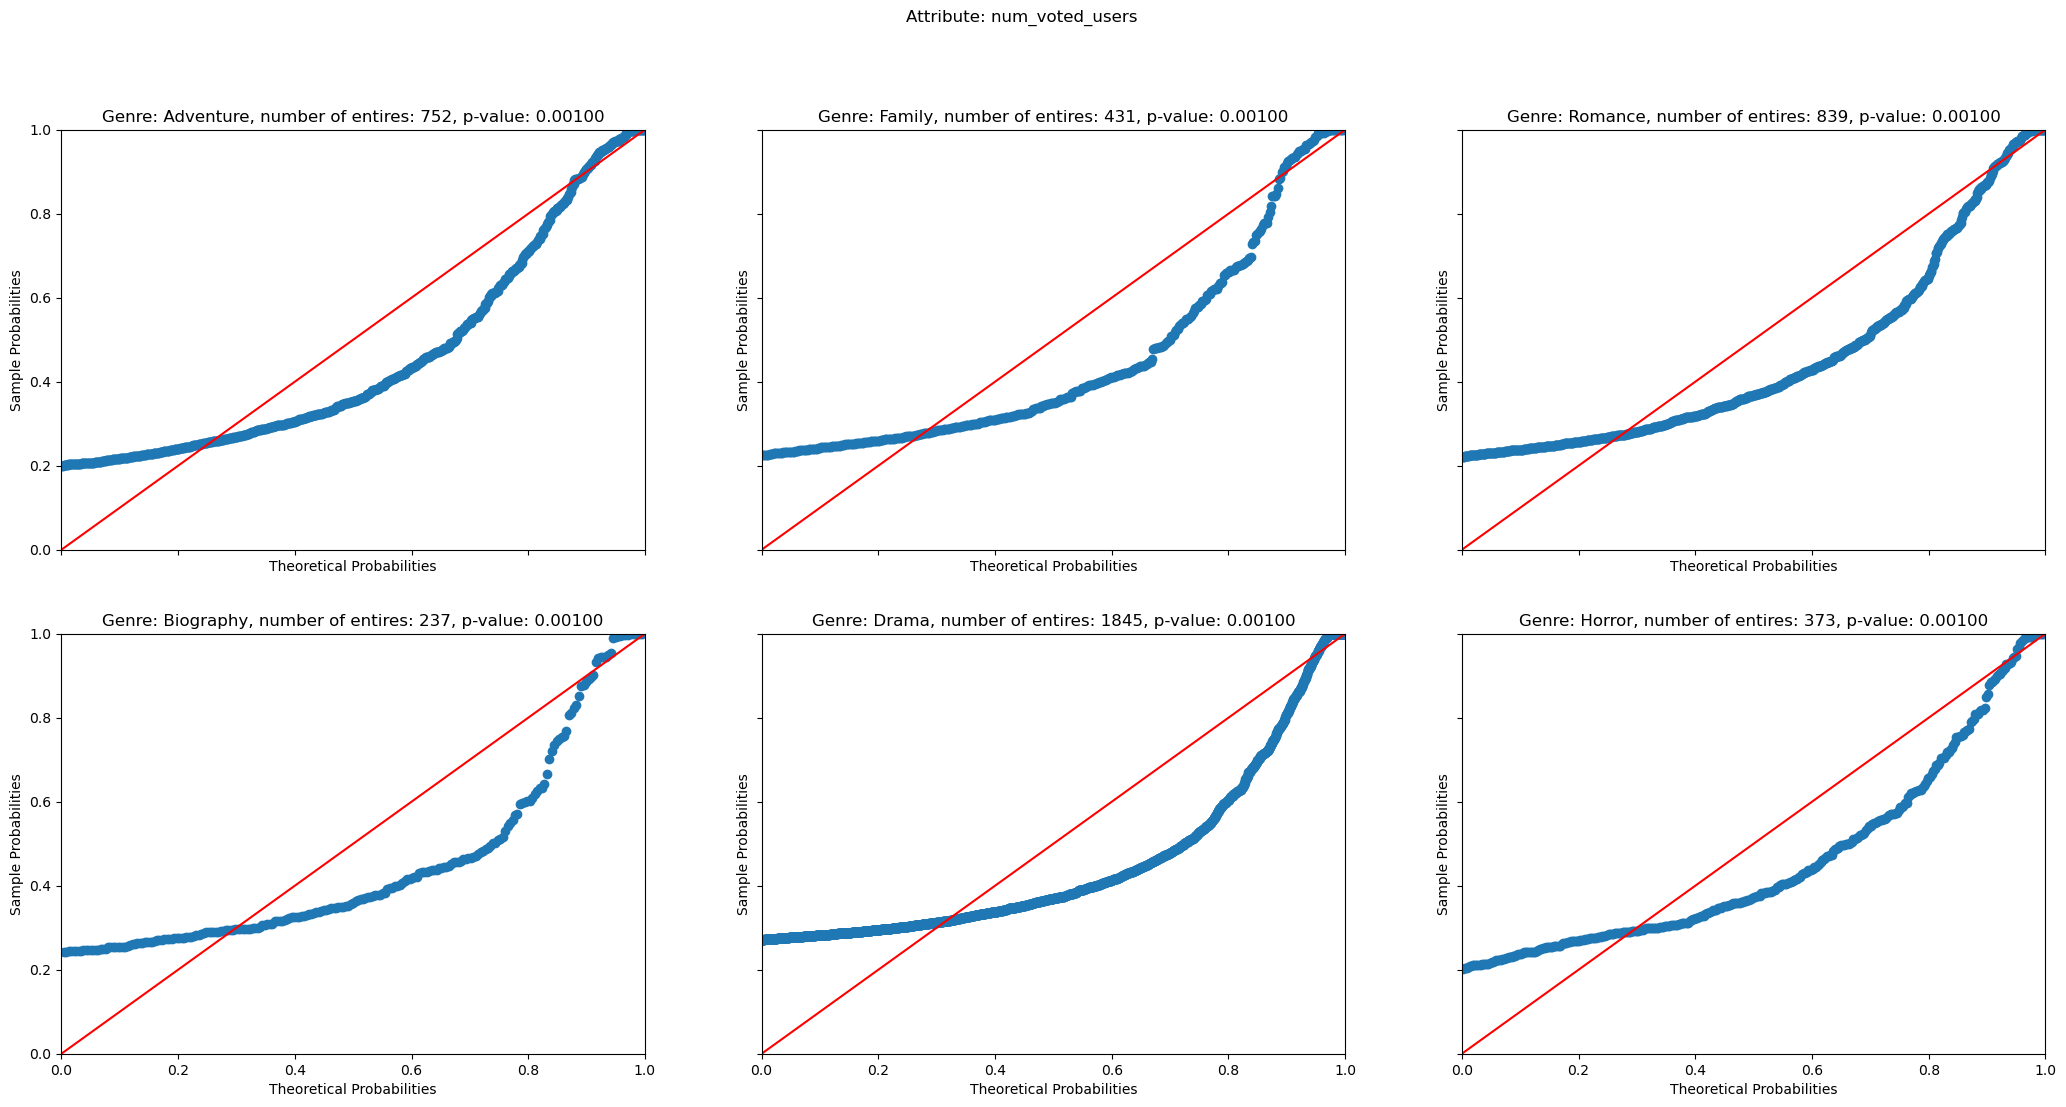

In [16]:
col = "num_voted_users"
col_series = df[[col,"genres"]]

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey=True)
for q,ax in zip(Top_genre,axes.flatten()):
    q_series = col_series[col_series["genres"].str.contains(q)][col]
    _, p_value = lilliefors(q_series,dist="norm")

    pp_x = sm.ProbPlot(q_series, dist=norm, fit=True)
    pp_x.ppplot(line="45",ax=ax)
    
    ax.set_title(f"Genre: {q}, number of entires: {len(q_series)}, p-value: {p_value:.5f}")

fig.suptitle(f"Attribute: {col}")
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 2.5)

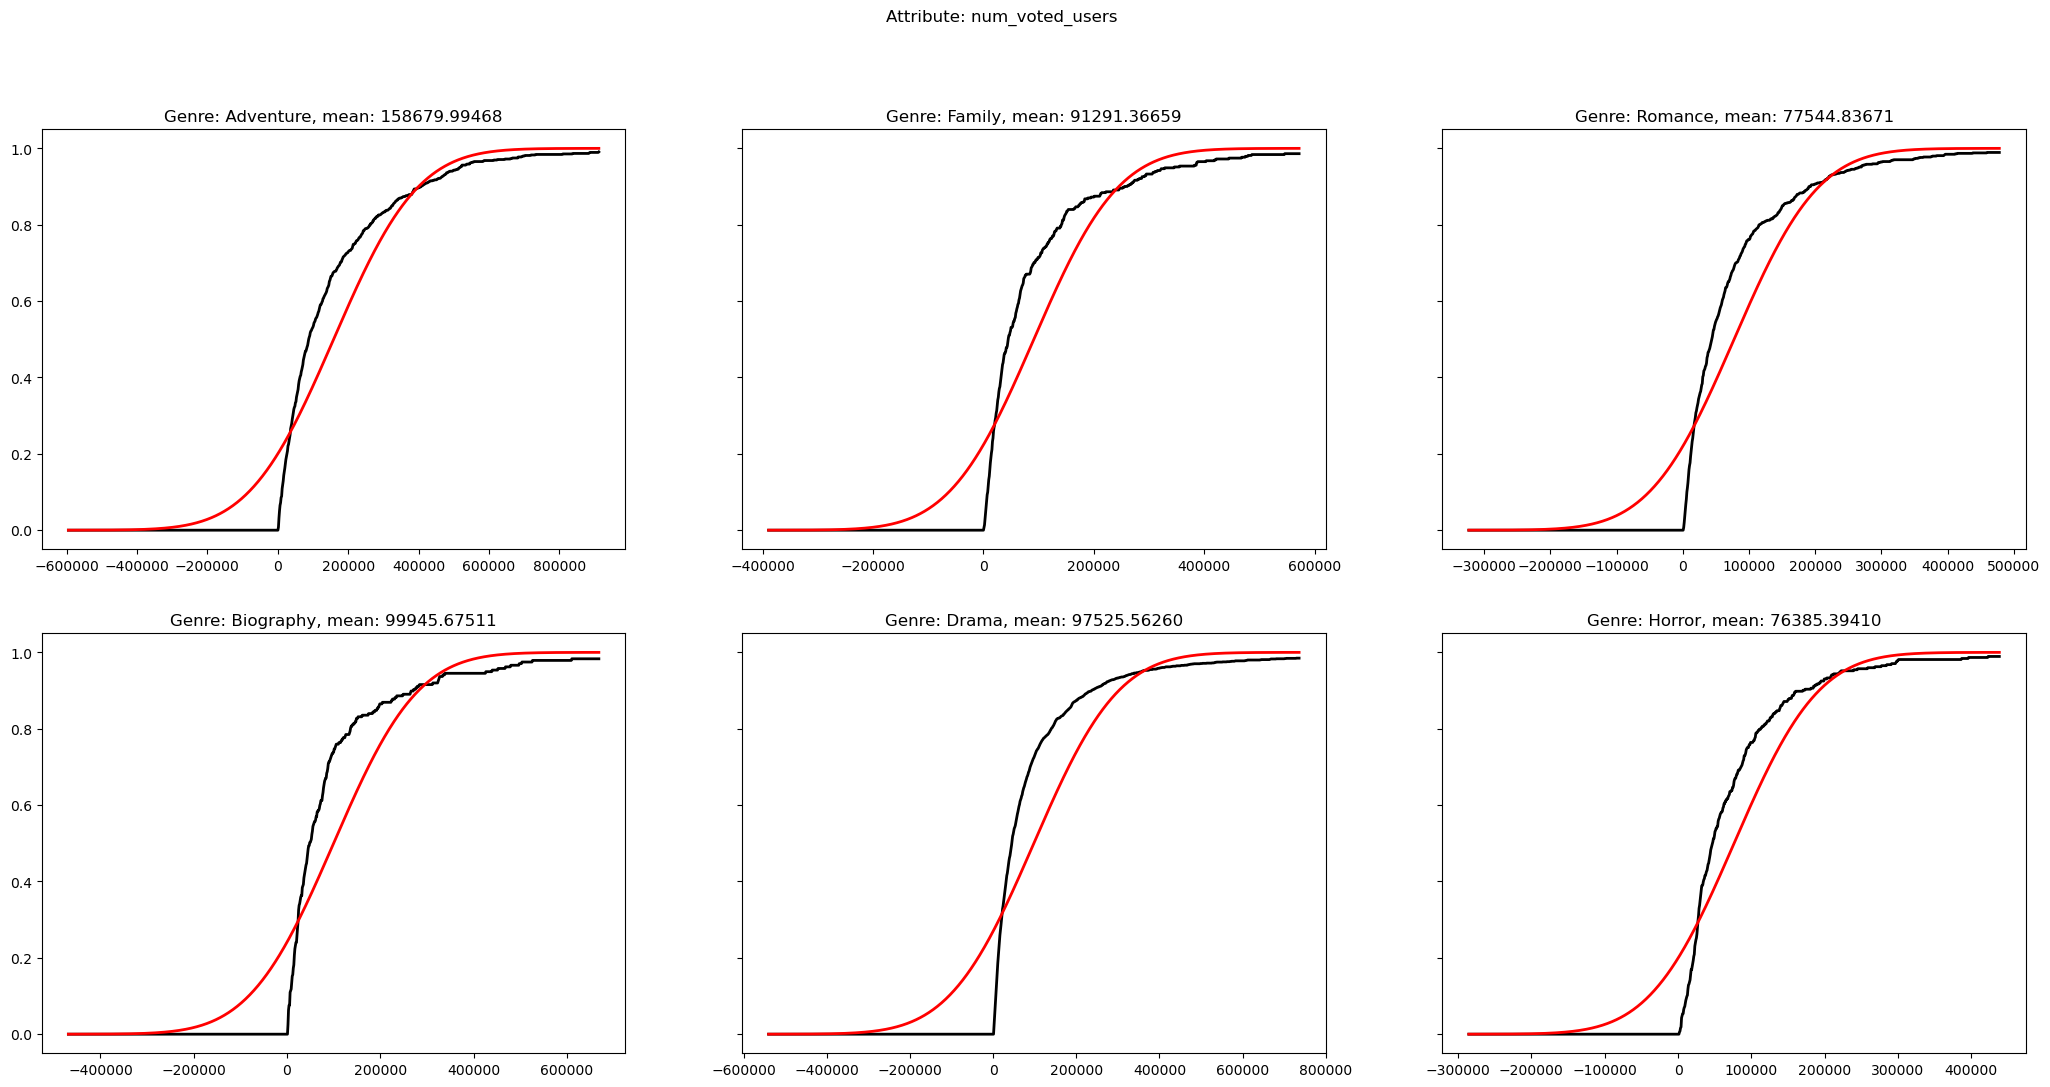

In [17]:

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharey=True)
for q,ax in zip(Top_genre,axes.flatten()):
    q_series = col_series[col_series["genres"].str.contains(q)][col]
    ecdf = ECDF(q_series)
    
    mean = q_series.mean()
    std = q_series.std(ddof=1)
    
    xax = np.linspace(mean - 4*std,mean + 4*std,1001)
    
    ax.plot(xax,ecdf(xax),c="k",lw=2)
    ax.plot(xax,norm(loc=mean,scale=std).cdf(xax),c="r",lw=2)
    
    ax.set_title(f"Genre: {q}, mean: {mean:.5f}")

fig.suptitle(f"Attribute: {col}")
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 2.5)

In [18]:
for q1,q2 in zip(Top_genre[:-2],Top_genre[1:]):

    data_1 = col_series[col_series["genres"].str.contains(q1)][col].to_numpy()
    data_2 = col_series[col_series["genres"].str.contains(q2)][col].to_numpy()
    
    d0 = 0 
    dbar, _, p_value = bootstrap_diff_means(data_1,data_2)
    print(f"Comparing {col} quality rating {q1} and {q2}")
    print(f"There is a probability of {p_value:.4f} that the observed difference of mean being different to {dbar:.4f} given the underlying difference of means is 0")
    print("\n")

Comparing num_voted_users quality rating Adventure and Family
There is a probability of 0.0001 that the observed difference of mean being different to 67388.6281 given the underlying difference of means is 0


Comparing num_voted_users quality rating Family and Romance
There is a probability of 0.0418 that the observed difference of mean being different to 13746.5299 given the underlying difference of means is 0


Comparing num_voted_users quality rating Romance and Biography
There is a probability of 0.0300 that the observed difference of mean being different to -22400.8384 given the underlying difference of means is 0


Comparing num_voted_users quality rating Biography and Drama
There is a probability of 0.8099 that the observed difference of mean being different to 2420.1125 given the underlying difference of means is 0




Based on num_voted_users, genre Horror, maybe we can make movie in horror genre.

## cast_total_fbk_likes

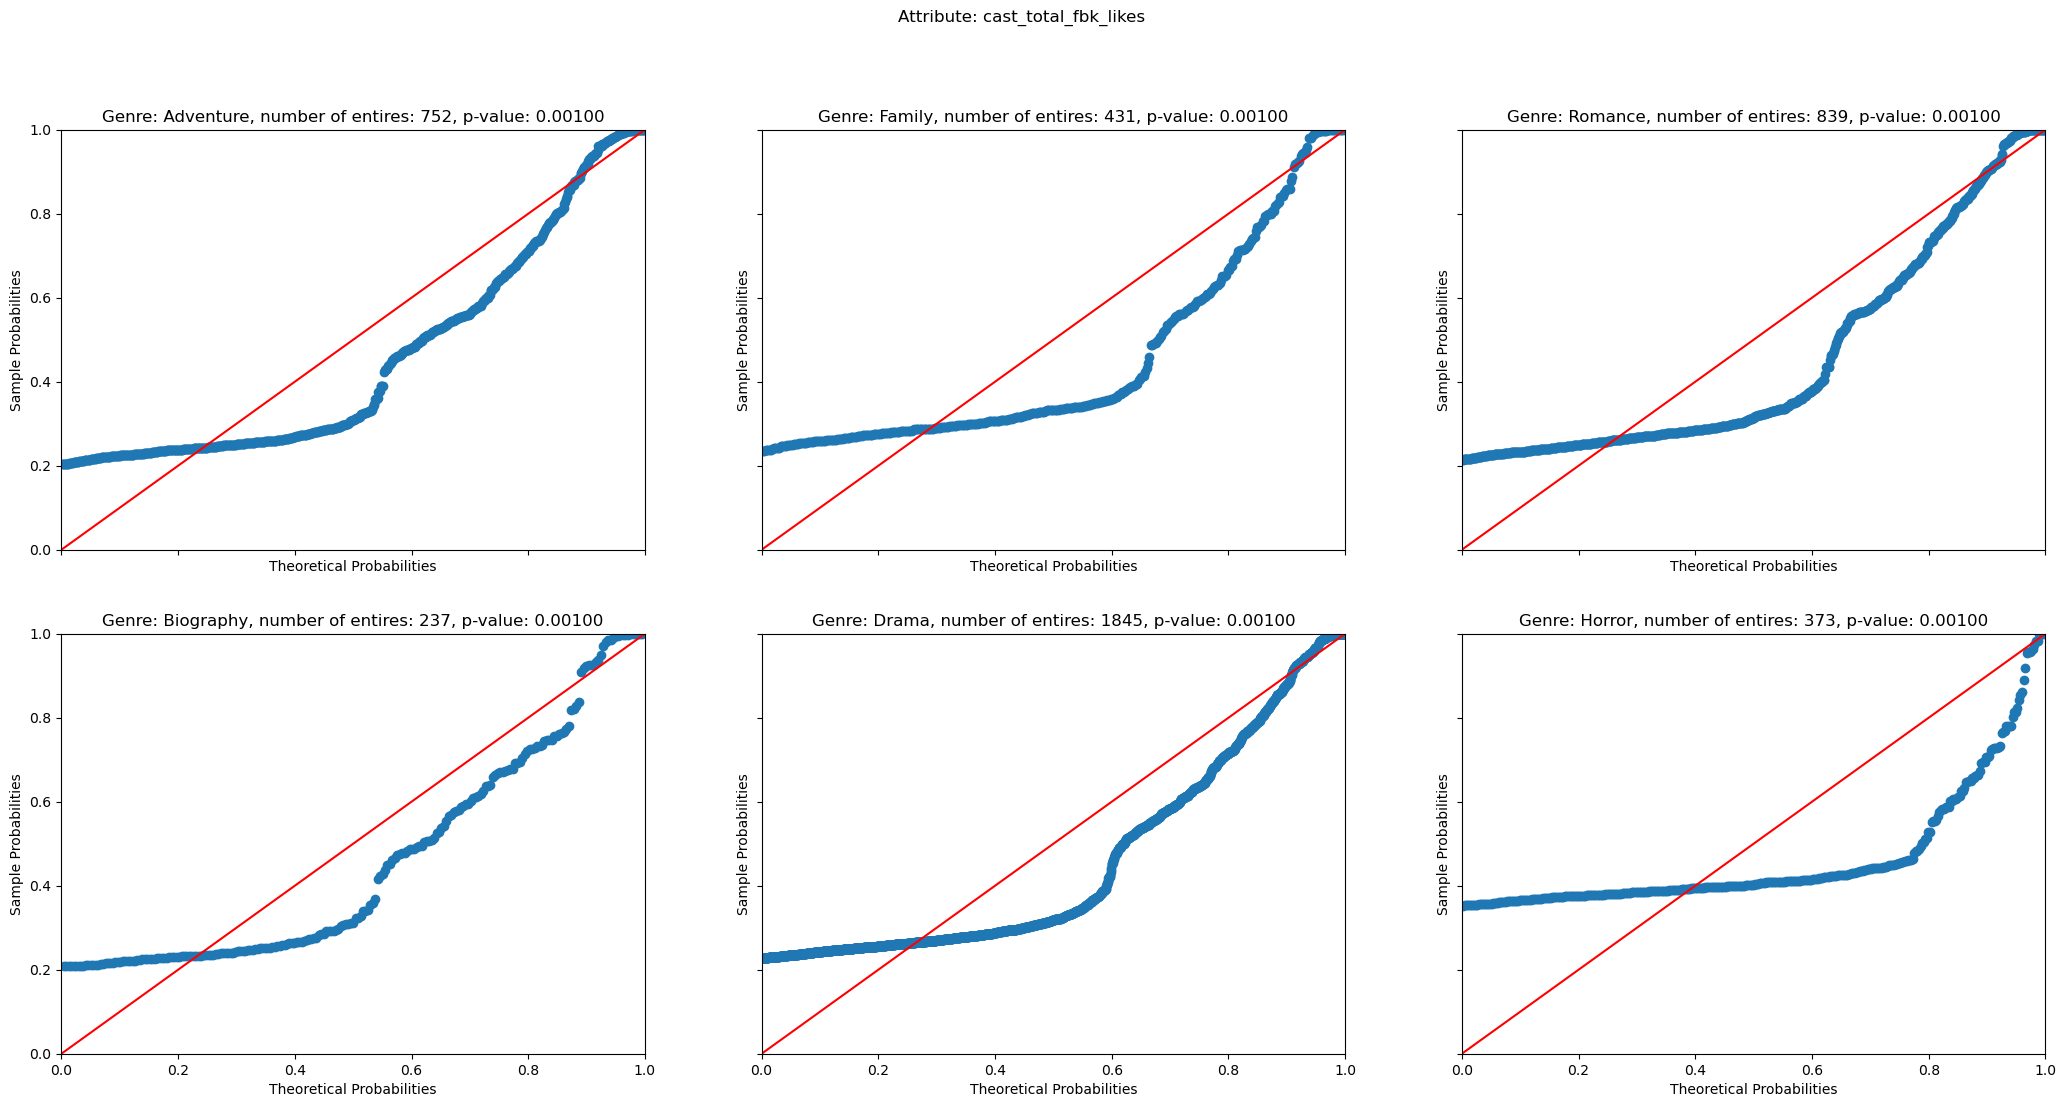

In [19]:

col = "cast_total_fbk_likes"
col_series = df[[col,"genres"]]

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey=True)
for q,ax in zip(Top_genre,axes.flatten()):
    q_series = col_series[col_series["genres"].str.contains(q)][col]
    _, p_value = lilliefors(q_series,dist="norm")

    pp_x = sm.ProbPlot(q_series, dist=norm, fit=True)
    pp_x.ppplot(line="45",ax=ax)
    
    ax.set_title(f"Genre: {q}, number of entires: {len(q_series)}, p-value: {p_value:.5f}")

fig.suptitle(f"Attribute: {col}")
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 2.5)

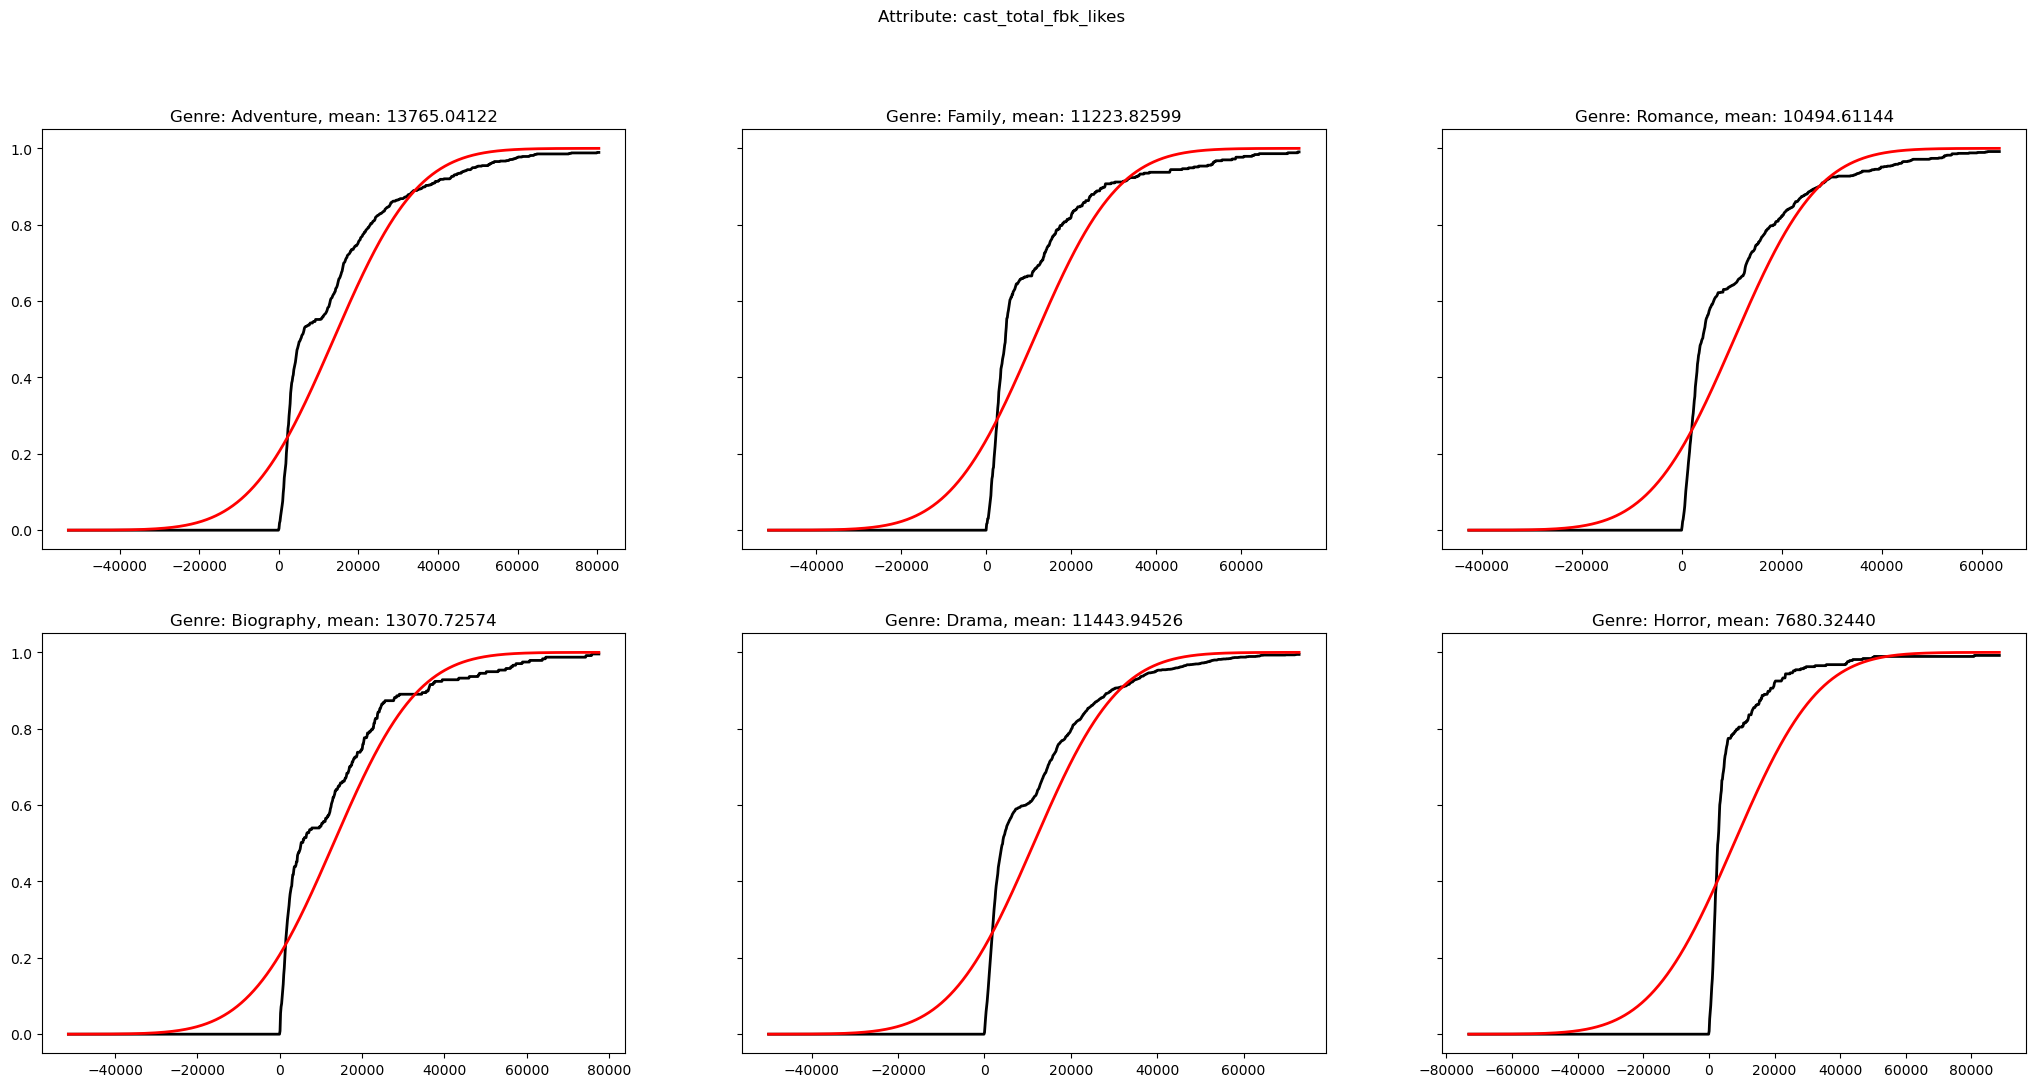

In [20]:

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharey=True)
for q,ax in zip(Top_genre,axes.flatten()):
    q_series = col_series[col_series["genres"].str.contains(q)][col]
    ecdf = ECDF(q_series)
    
    mean = q_series.mean()
    std = q_series.std(ddof=1)
    
    xax = np.linspace(mean - 4*std,mean + 4*std,1001)
    
    ax.plot(xax,ecdf(xax),c="k",lw=2)
    ax.plot(xax,norm(loc=mean,scale=std).cdf(xax),c="r",lw=2)
    
    ax.set_title(f"Genre: {q}, mean: {mean:.5f}")

fig.suptitle(f"Attribute: {col}")
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 2.5)

In [21]:
for q1,q2 in zip(Top_genre[:-2],Top_genre[1:]):

    data_1 = col_series[col_series["genres"].str.contains(q1)][col].to_numpy()
    data_2 = col_series[col_series["genres"].str.contains(q2)][col].to_numpy()
    
    d0 = 0 
    dbar, _, p_value = bootstrap_diff_means(data_1,data_2)
    print(f"Comparing {col} quality rating {q1} and {q2}")
    print(f"There is a probability of {p_value:.4f} that the observed difference of mean being different to {dbar:.4f} given the underlying difference of means is 0")
    print("\n")

Comparing cast_total_fbk_likes quality rating Adventure and Family
There is a probability of 0.0088 that the observed difference of mean being different to 2541.2152 given the underlying difference of means is 0


Comparing cast_total_fbk_likes quality rating Family and Romance
There is a probability of 0.4131 that the observed difference of mean being different to 729.2145 given the underlying difference of means is 0


Comparing cast_total_fbk_likes quality rating Romance and Biography
There is a probability of 0.0277 that the observed difference of mean being different to -2576.1143 given the underlying difference of means is 0


Comparing cast_total_fbk_likes quality rating Biography and Drama
There is a probability of 0.1452 that the observed difference of mean being different to 1626.7805 given the underlying difference of means is 0




## num_user_for_reviews

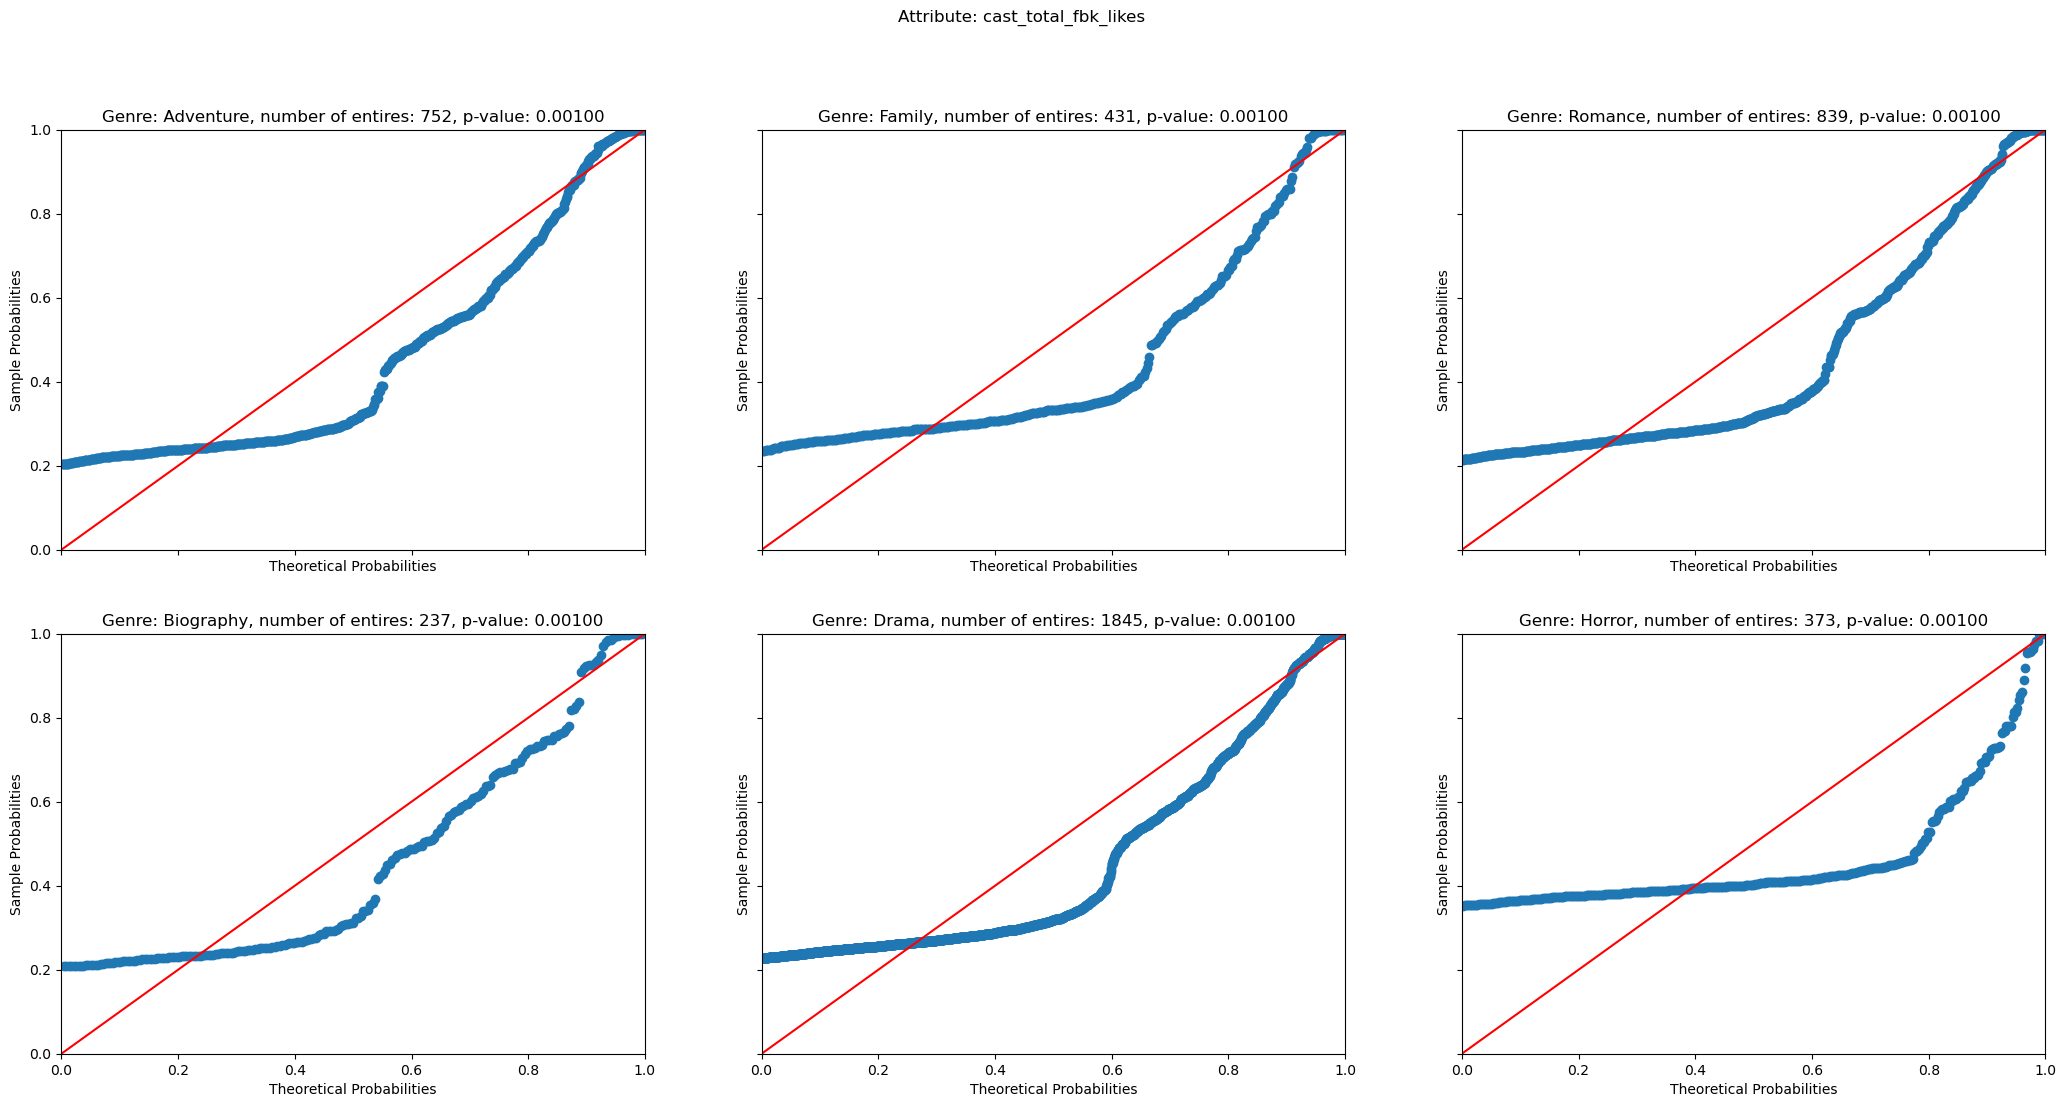

In [22]:

col = "cast_total_fbk_likes"
col_series = df[[col,"genres"]]

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey=True)
for q,ax in zip(Top_genre,axes.flatten()):
    q_series = col_series[col_series["genres"].str.contains(q)][col]
    _, p_value = lilliefors(q_series,dist="norm")

    pp_x = sm.ProbPlot(q_series, dist=norm, fit=True)
    pp_x.ppplot(line="45",ax=ax)
    
    ax.set_title(f"Genre: {q}, number of entires: {len(q_series)}, p-value: {p_value:.5f}")

fig.suptitle(f"Attribute: {col}")
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 2.5)

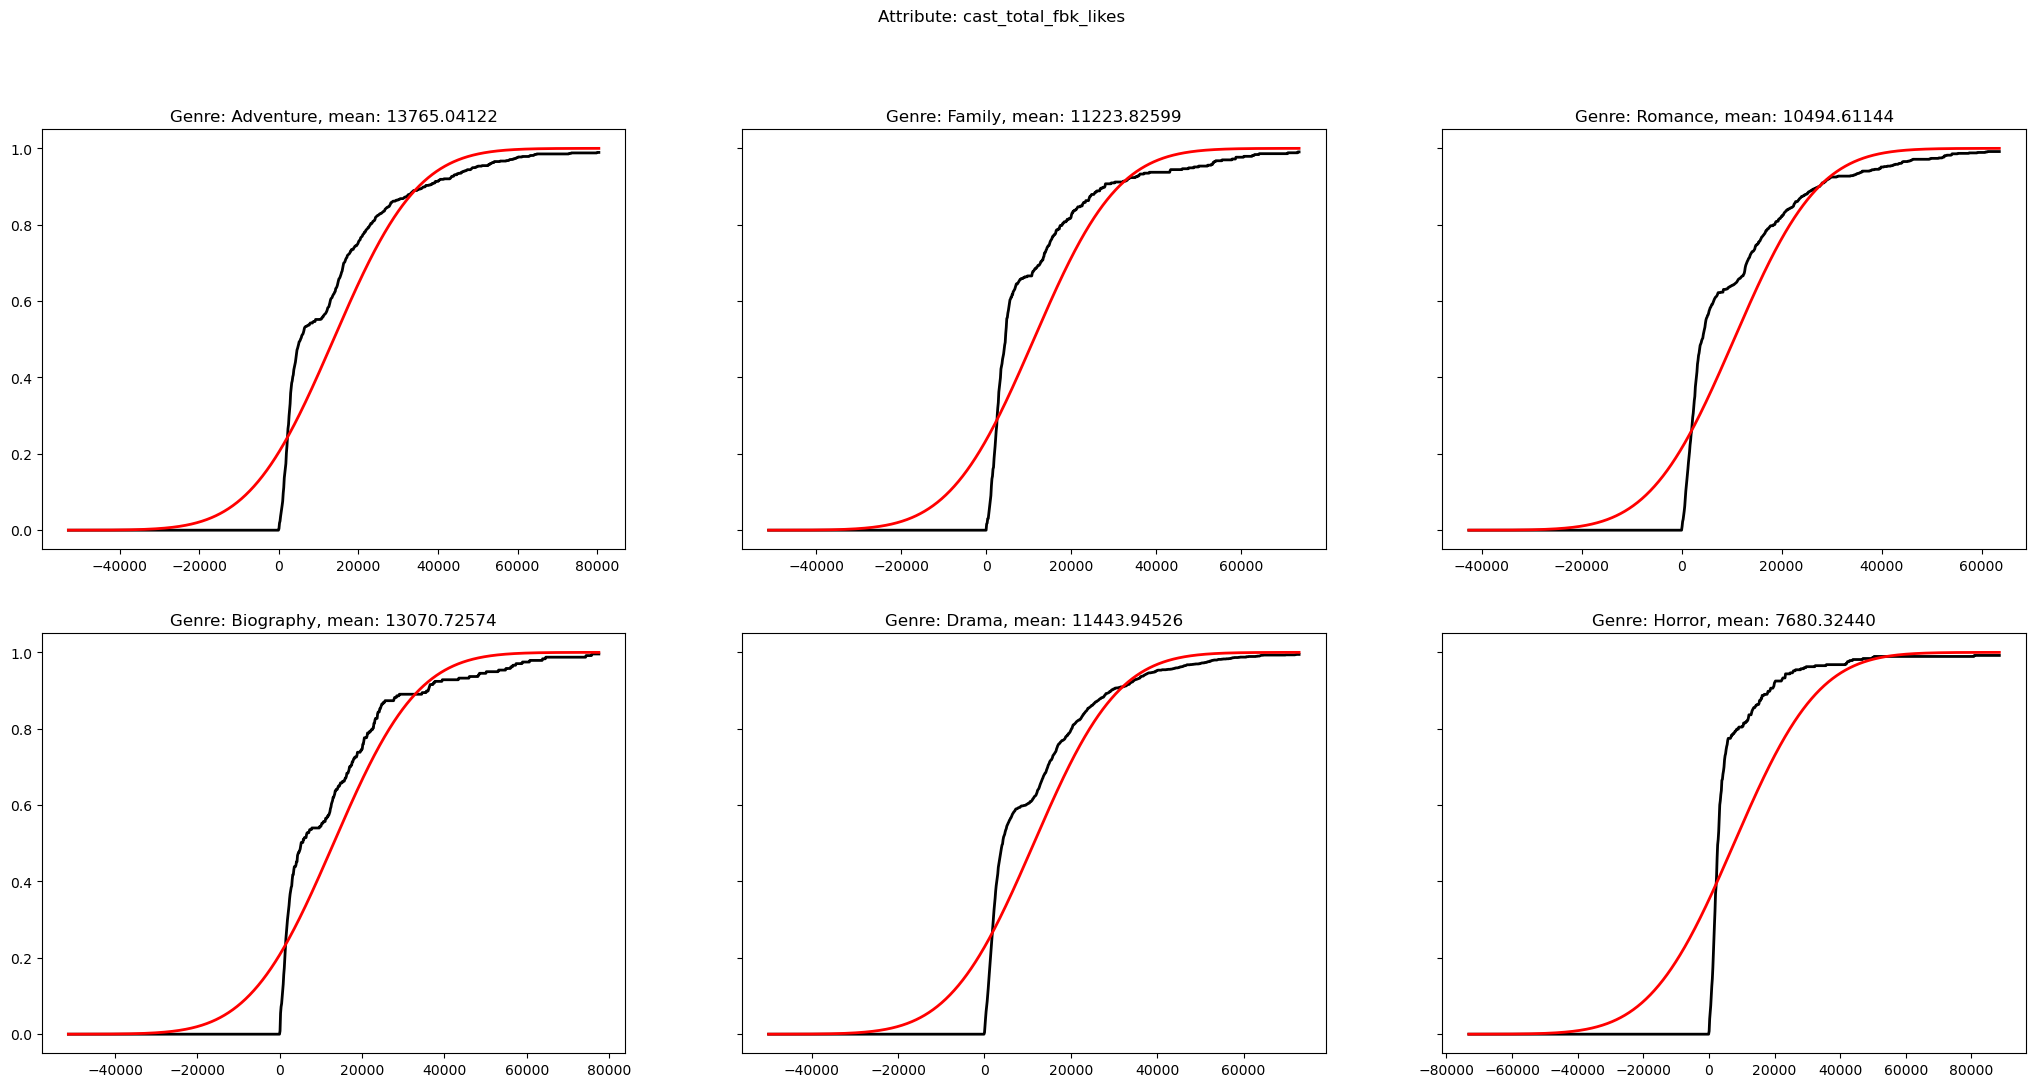

In [23]:

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharey=True)
for q,ax in zip(Top_genre,axes.flatten()):
    q_series = col_series[col_series["genres"].str.contains(q)][col]
    ecdf = ECDF(q_series)
    
    mean = q_series.mean()
    std = q_series.std(ddof=1)
    
    xax = np.linspace(mean - 4*std,mean + 4*std,1001)
    
    ax.plot(xax,ecdf(xax),c="k",lw=2)
    ax.plot(xax,norm(loc=mean,scale=std).cdf(xax),c="r",lw=2)
    
    ax.set_title(f"Genre: {q}, mean: {mean:.5f}")

fig.suptitle(f"Attribute: {col}")
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 2.5)

In [24]:
for q1,q2 in zip(Top_genre[:-2],Top_genre[1:]):

    data_1 = col_series[col_series["genres"].str.contains(q1)][col].to_numpy()
    data_2 = col_series[col_series["genres"].str.contains(q2)][col].to_numpy()
    
    d0 = 0 
    dbar, _, p_value = bootstrap_diff_means(data_1,data_2)
    print(f"Comparing {col} quality rating {q1} and {q2}")
    print(f"There is a probability of {p_value:.4f} that the observed difference of mean being different to {dbar:.4f} given the underlying difference of means is 0")
    print("\n")

Comparing cast_total_fbk_likes quality rating Adventure and Family
There is a probability of 0.0090 that the observed difference of mean being different to 2541.2152 given the underlying difference of means is 0


Comparing cast_total_fbk_likes quality rating Family and Romance
There is a probability of 0.4081 that the observed difference of mean being different to 729.2145 given the underlying difference of means is 0


Comparing cast_total_fbk_likes quality rating Romance and Biography
There is a probability of 0.0241 that the observed difference of mean being different to -2576.1143 given the underlying difference of means is 0


Comparing cast_total_fbk_likes quality rating Biography and Drama
There is a probability of 0.1380 that the observed difference of mean being different to 1626.7805 given the underlying difference of means is 0




## budget

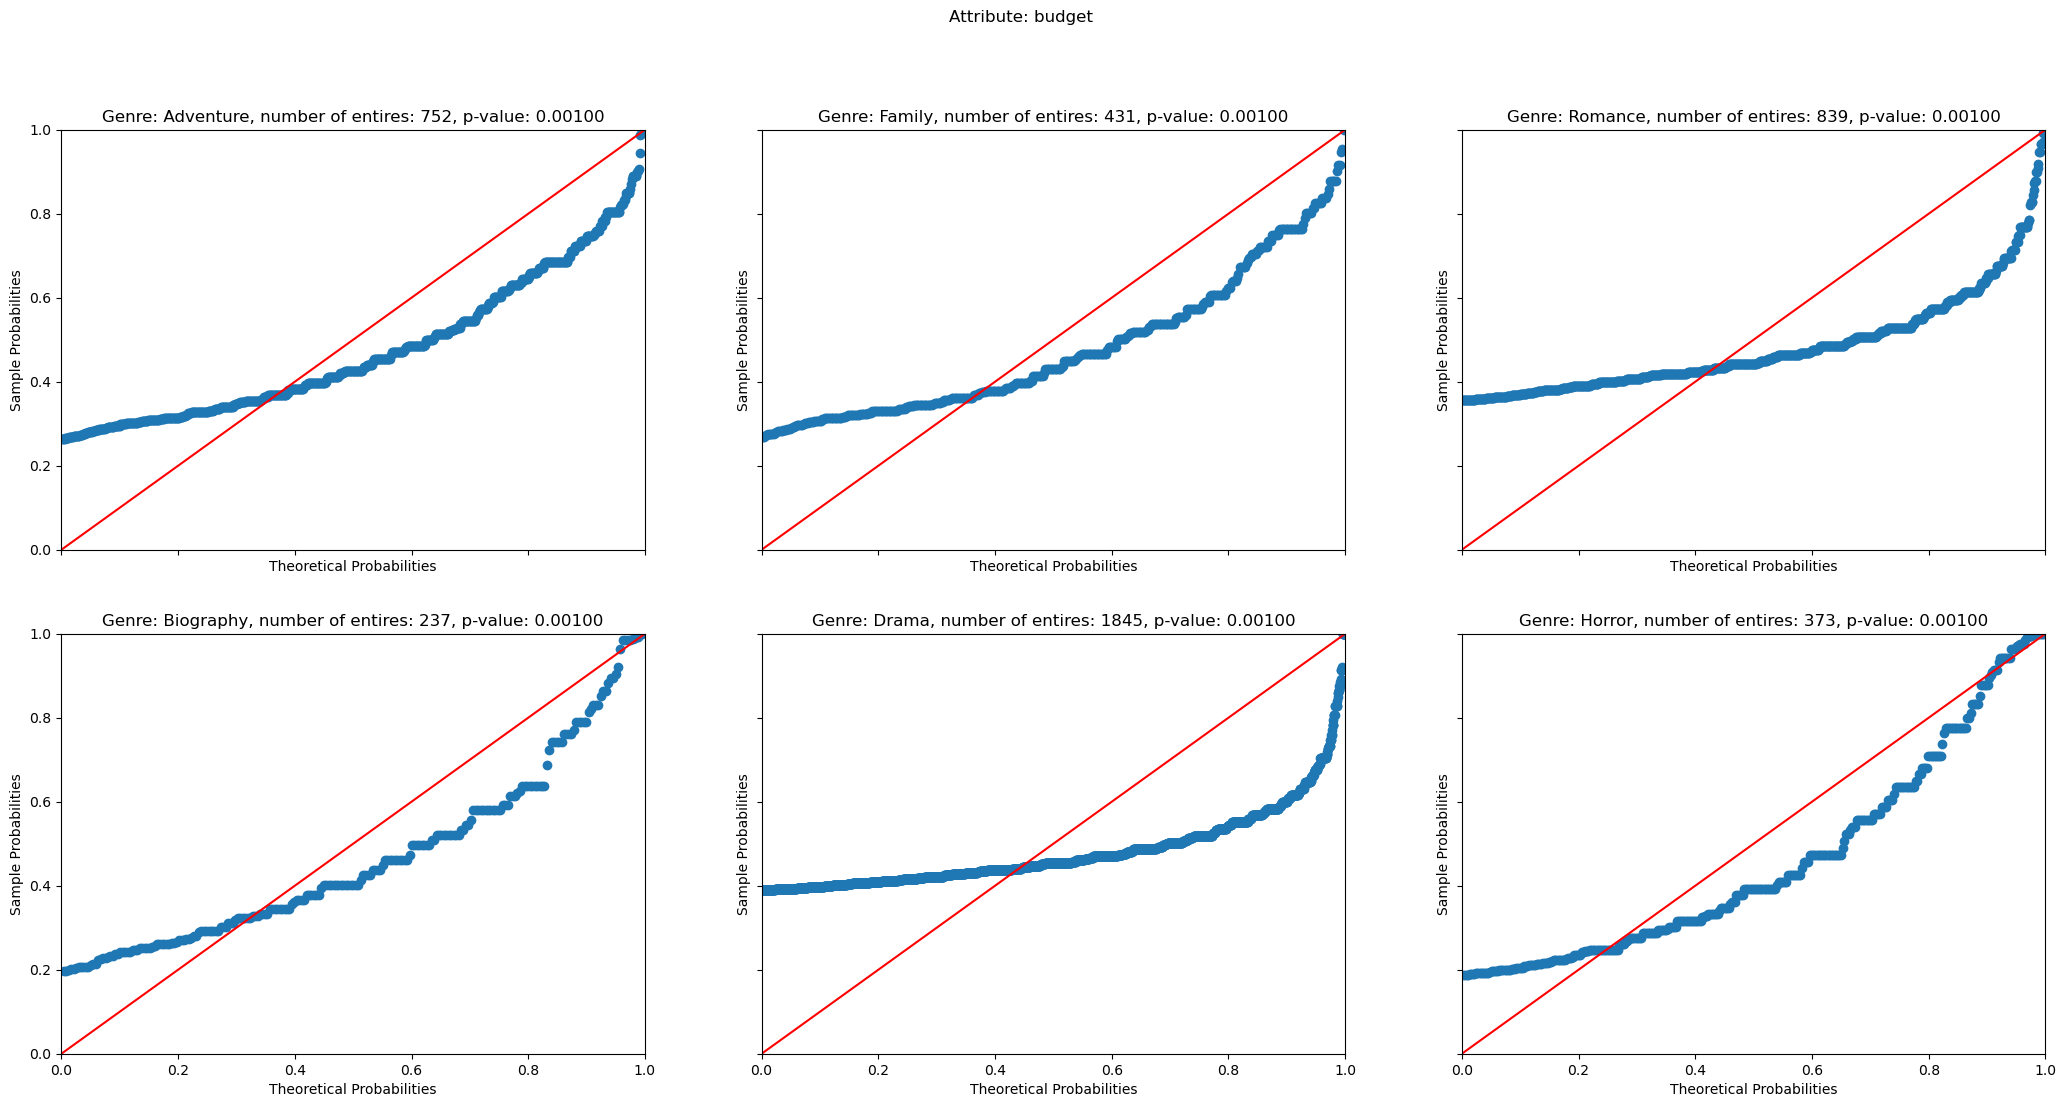

In [25]:

col = "budget"
col_series = df[[col,"genres"]]

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey=True)
for q,ax in zip(Top_genre,axes.flatten()):
    q_series = col_series[col_series["genres"].str.contains(q)][col]
    _, p_value = lilliefors(q_series,dist="norm")

    pp_x = sm.ProbPlot(q_series, dist=norm, fit=True)
    pp_x.ppplot(line="45",ax=ax)
    
    ax.set_title(f"Genre: {q}, number of entires: {len(q_series)}, p-value: {p_value:.5f}")

fig.suptitle(f"Attribute: {col}")
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 2.5)

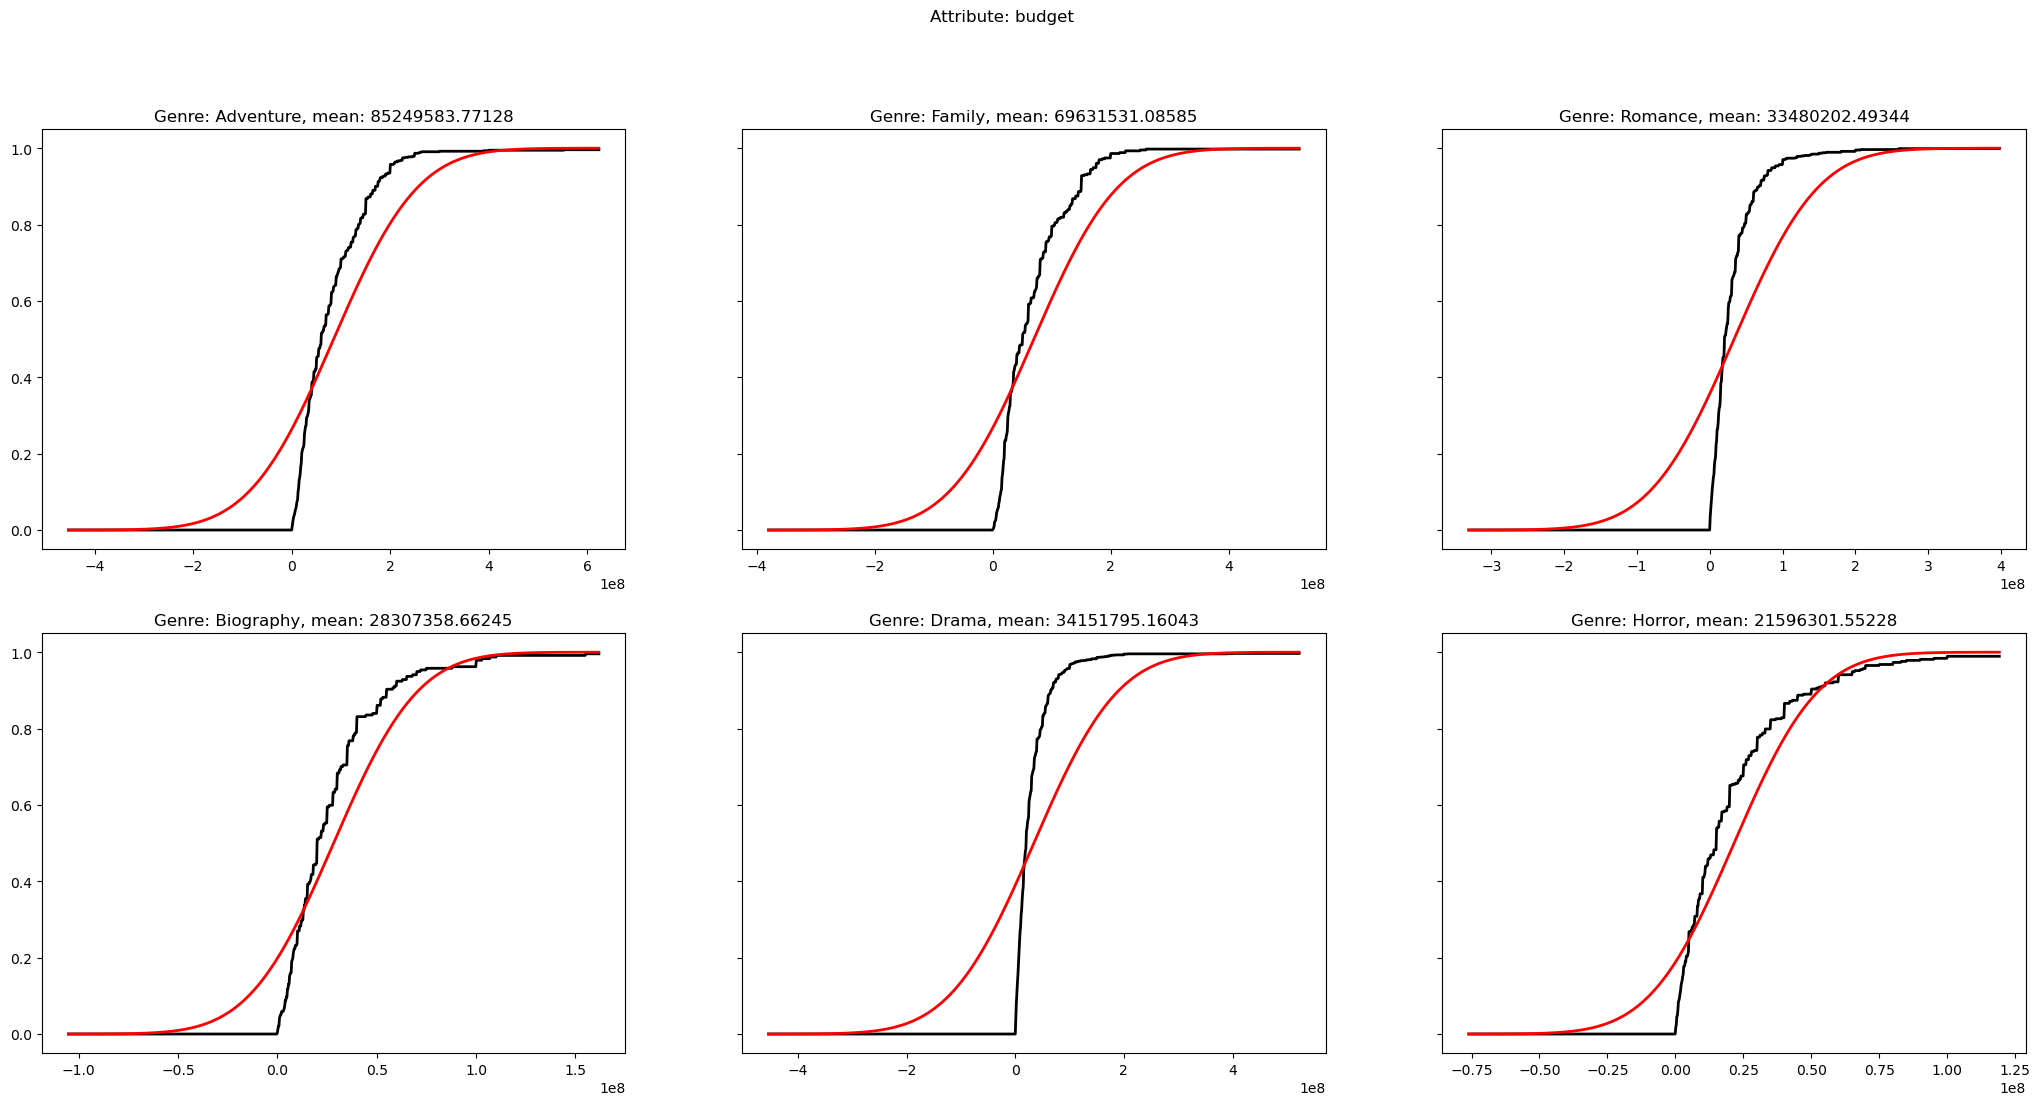

In [26]:

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharey=True)
for q,ax in zip(Top_genre,axes.flatten()):
    q_series = col_series[col_series["genres"].str.contains(q)][col]
    ecdf = ECDF(q_series)
    
    mean = q_series.mean()
    std = q_series.std(ddof=1)
    
    xax = np.linspace(mean - 4*std,mean + 4*std,1001)
    
    ax.plot(xax,ecdf(xax),c="k",lw=2)
    ax.plot(xax,norm(loc=mean,scale=std).cdf(xax),c="r",lw=2)
    
    ax.set_title(f"Genre: {q}, mean: {mean:.5f}")

fig.suptitle(f"Attribute: {col}")
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 2.5)

In [27]:
for q1,q2 in zip(Top_genre[:-2],Top_genre[1:]):

    data_1 = col_series[col_series["genres"].str.contains(q1)][col].to_numpy()
    data_2 = col_series[col_series["genres"].str.contains(q2)][col].to_numpy()
    
    d0 = 0 
    dbar, _, p_value = bootstrap_diff_means(data_1,data_2)
    print(f"Comparing {col} quality rating {q1} and {q2}")
    print(f"There is a probability of {p_value:.4f} that the observed difference of mean being different to {dbar:.4f} given the underlying difference of means is 0")
    print("\n")

Comparing budget quality rating Adventure and Family
There is a probability of 0.0281 that the observed difference of mean being different to 15618052.6854 given the underlying difference of means is 0


Comparing budget quality rating Family and Romance
There is a probability of 0.0001 that the observed difference of mean being different to 36151328.5924 given the underlying difference of means is 0


Comparing budget quality rating Romance and Biography
There is a probability of 0.2129 that the observed difference of mean being different to 5172843.8310 given the underlying difference of means is 0


Comparing budget quality rating Biography and Drama
There is a probability of 0.1171 that the observed difference of mean being different to -5844436.4980 given the underlying difference of means is 0




## profit

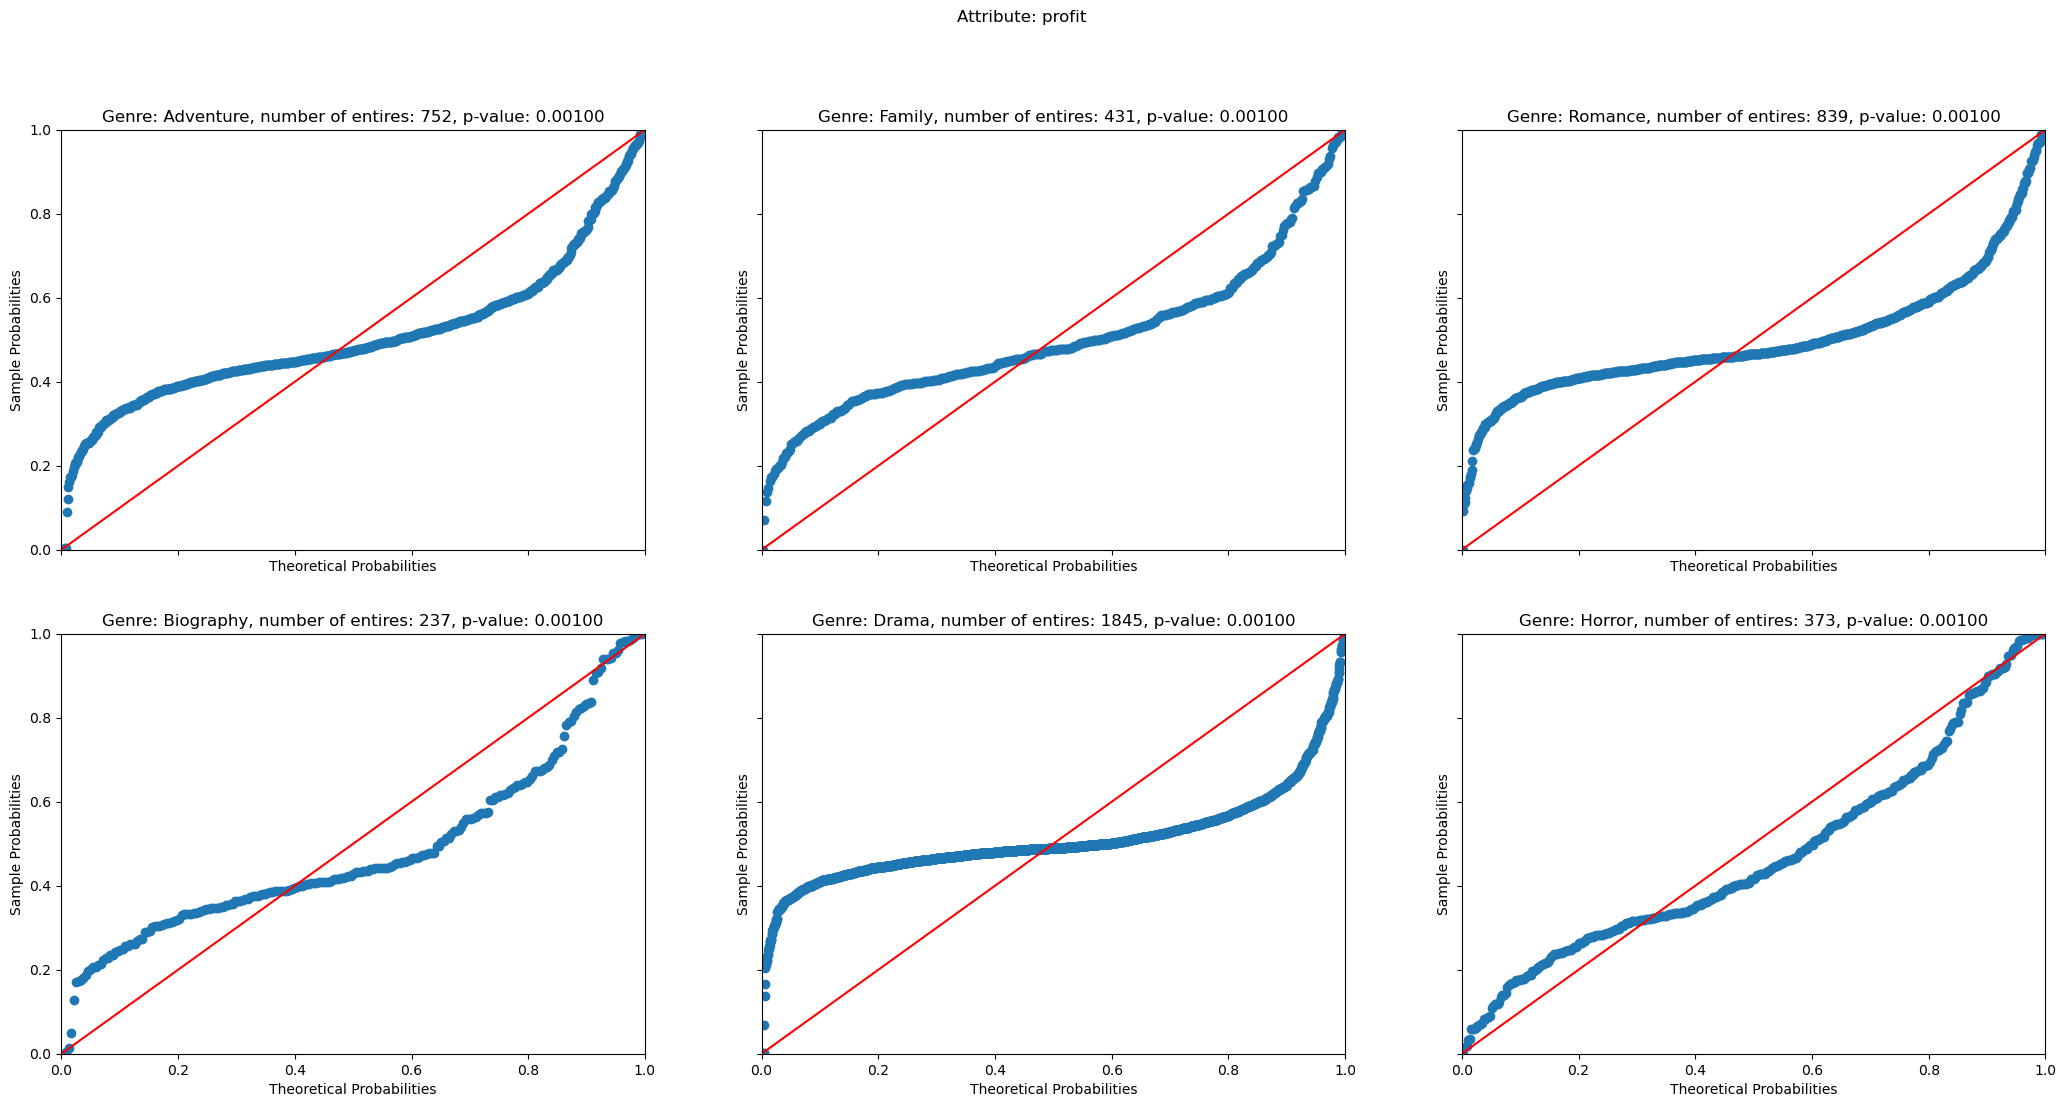

In [28]:

col = "profit"
col_series = df[[col,"genres"]]

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey=True)
for q,ax in zip(Top_genre,axes.flatten()):
    q_series = col_series[col_series["genres"].str.contains(q)][col]
    _, p_value = lilliefors(q_series,dist="norm")

    pp_x = sm.ProbPlot(q_series, dist=norm, fit=True)
    pp_x.ppplot(line="45",ax=ax)
    
    ax.set_title(f"Genre: {q}, number of entires: {len(q_series)}, p-value: {p_value:.5f}")

fig.suptitle(f"Attribute: {col}")
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 2.5)

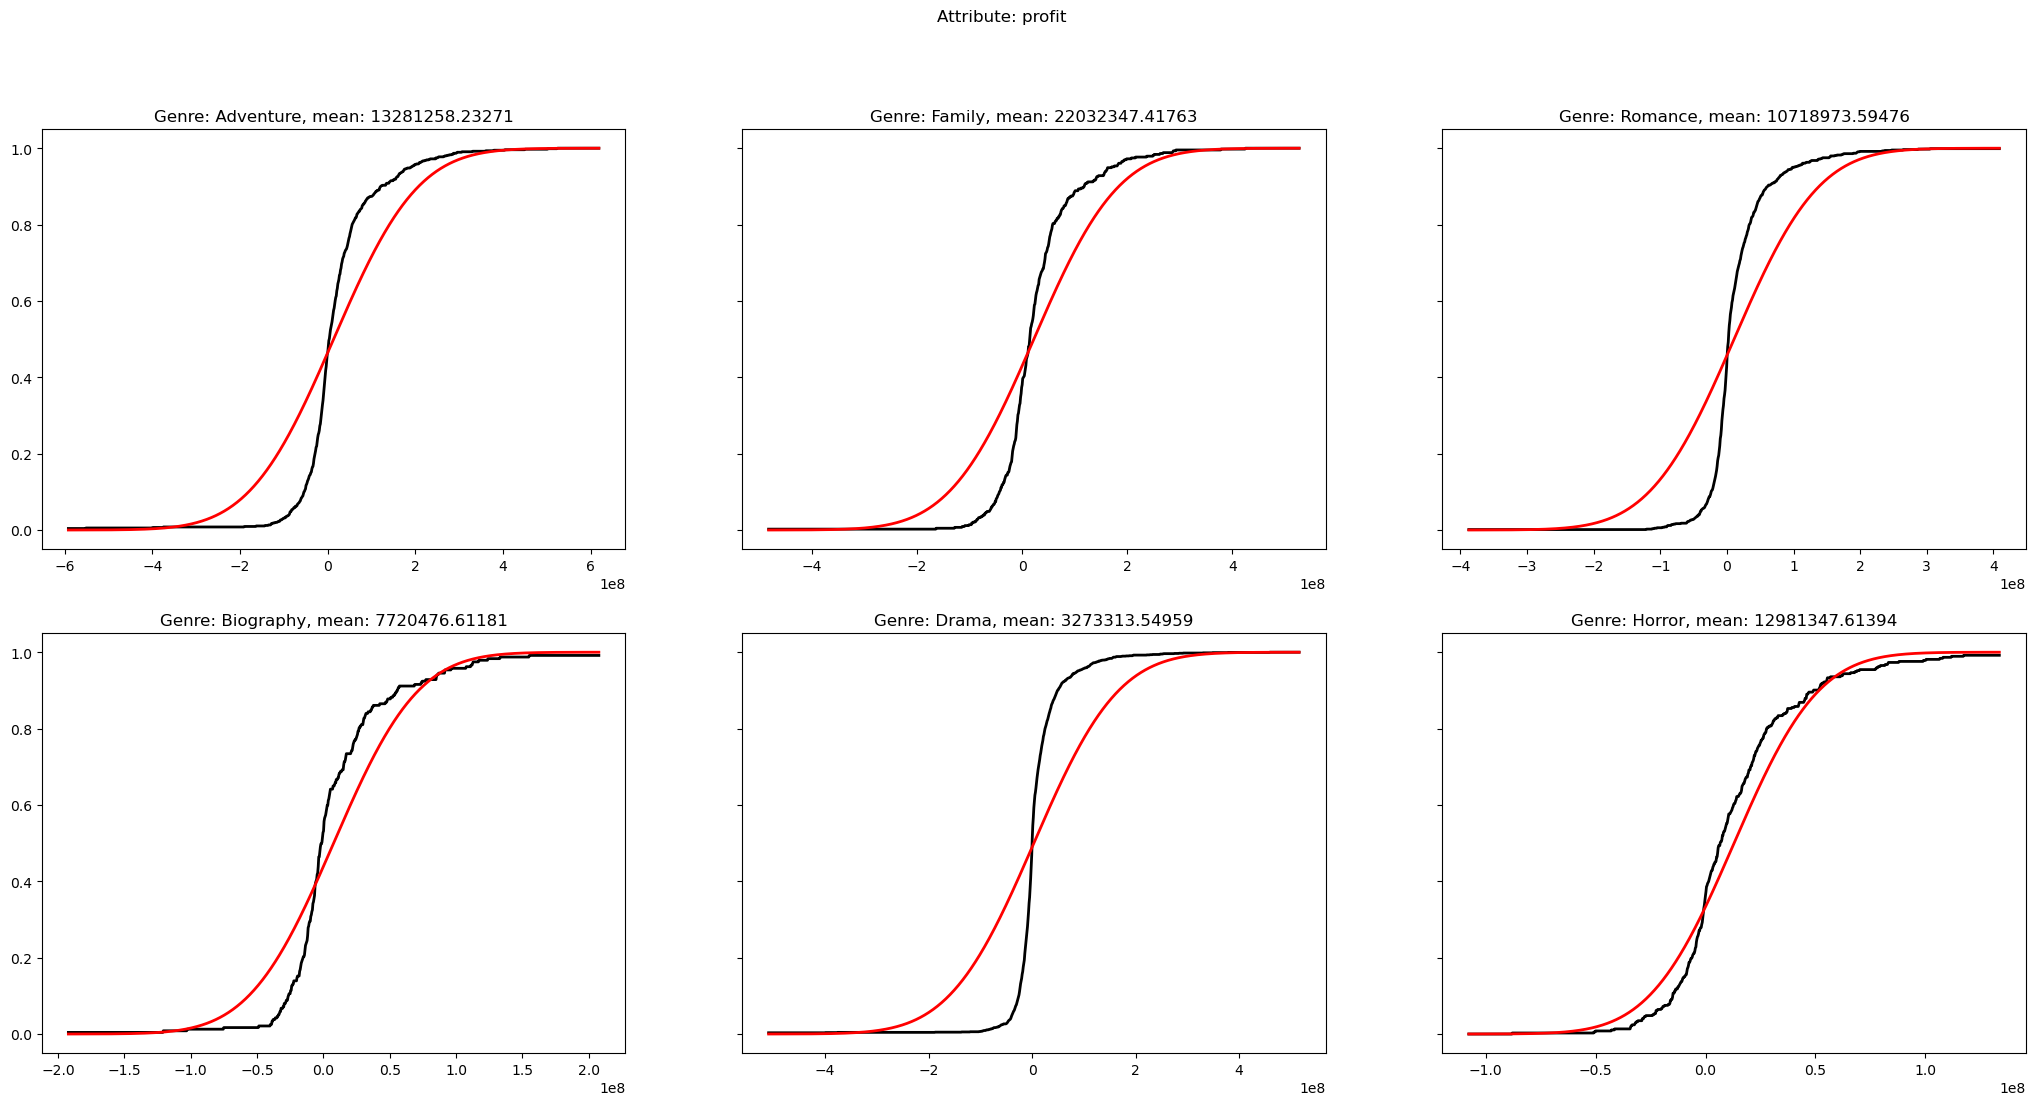

In [29]:

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharey=True)
for q,ax in zip(Top_genre,axes.flatten()):
    q_series = col_series[col_series["genres"].str.contains(q)][col]
    ecdf = ECDF(q_series)
    
    mean = q_series.mean()
    std = q_series.std(ddof=1)
    
    xax = np.linspace(mean - 4*std,mean + 4*std,1001)
    
    ax.plot(xax,ecdf(xax),c="k",lw=2)
    ax.plot(xax,norm(loc=mean,scale=std).cdf(xax),c="r",lw=2)
    
    ax.set_title(f"Genre: {q}, mean: {mean:.5f}")

fig.suptitle(f"Attribute: {col}")
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 2.5)

In [30]:
for q1,q2 in zip(Top_genre[:-2],Top_genre[1:]):

    data_1 = col_series[col_series["genres"].str.contains(q1)][col].to_numpy()
    data_2 = col_series[col_series["genres"].str.contains(q2)][col].to_numpy()
    
    d0 = 0 
    dbar, _, p_value = bootstrap_diff_means(data_1,data_2)
    print(f"Comparing {col} quality rating {q1} and {q2}")
    print(f"There is a probability of {p_value:.4f} that the observed difference of mean being different to {dbar:.4f} given the underlying difference of means is 0")
    print("\n")

Comparing profit quality rating Adventure and Family
There is a probability of 0.2994 that the observed difference of mean being different to -8751089.1849 given the underlying difference of means is 0


Comparing profit quality rating Family and Romance
There is a probability of 0.1199 that the observed difference of mean being different to 11313373.8229 given the underlying difference of means is 0


Comparing profit quality rating Romance and Biography
There is a probability of 0.5473 that the observed difference of mean being different to 2998496.9829 given the underlying difference of means is 0


Comparing profit quality rating Biography and Drama
There is a probability of 0.3284 that the observed difference of mean being different to 4447163.0622 given the underlying difference of means is 0




After analyising the plots, we can say that making a horror movie will be a safe bet